In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from imblearn.over_sampling import SMOTE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/Danmini_Doorbell.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      354.000000            0.000000          1.000000   
2          1.857879      360.458980           35.789338          1.912127   
3          1.000000      337.000000            0.000000          1.000000   
4          1.680223      172.140917        18487.448750          1.793580   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      354.000000            0.000000          1.000000      354.000000   
2      360.275733           35.923972          1.969807      360.091968   
3      337.000000            0.000000          1.000000      337.000000   
4      182.560279        18928.175300          1.925828      193.165753   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000     60.000000   
1            0.000000     1.000000  ...        1.000032    353.999619   
2           35.991542     1.857879  ...        1.912156    360.275456   
3            0.000000     1.000000  ...        1.000000    337.000000   
4        19153.795810     1.680223  ...        1.000000     60.000000   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.067642                 0.0          0.0        1.031757    353.630645   
2     5.994038                 0.0          0.0        2.000605    359.813452   
3     0.000000                 0.0          0.0        1.000000    337.000000   
4     0.000000                 0.0          0.0        1.000000     60.000000   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     2.072641                 0.0          0.0  
2     6.356005                 0.0          0.0  
3     0.000000                 0.0          0.0  
4     0.000000                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0                 False           False               False             False   
1                 False           False               False             False   
2                 False           False               False             False   
3                 False           False               False             False   
4                 False           False               False             False   
...                 ...             ...                 ...               ...   
49543             False           False               False             False   
49544             False           False               False             False   
49545             False           False               False             False   
49546             False           False               False             False   
49547             False           False               False             False   

 

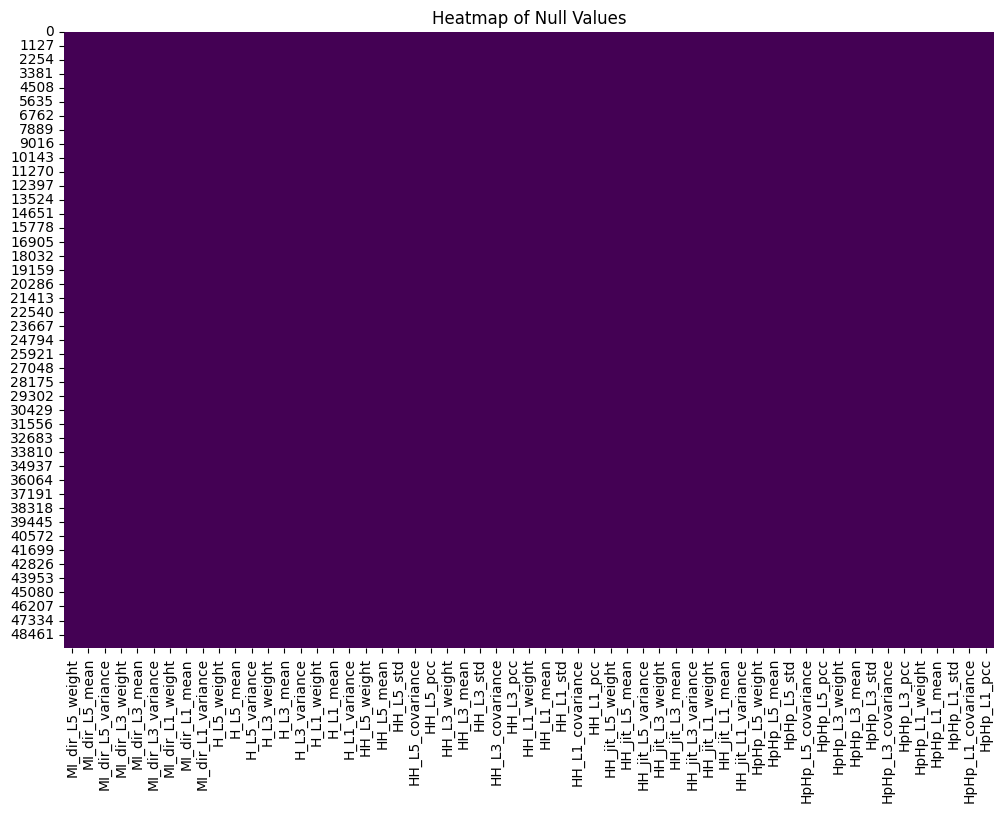

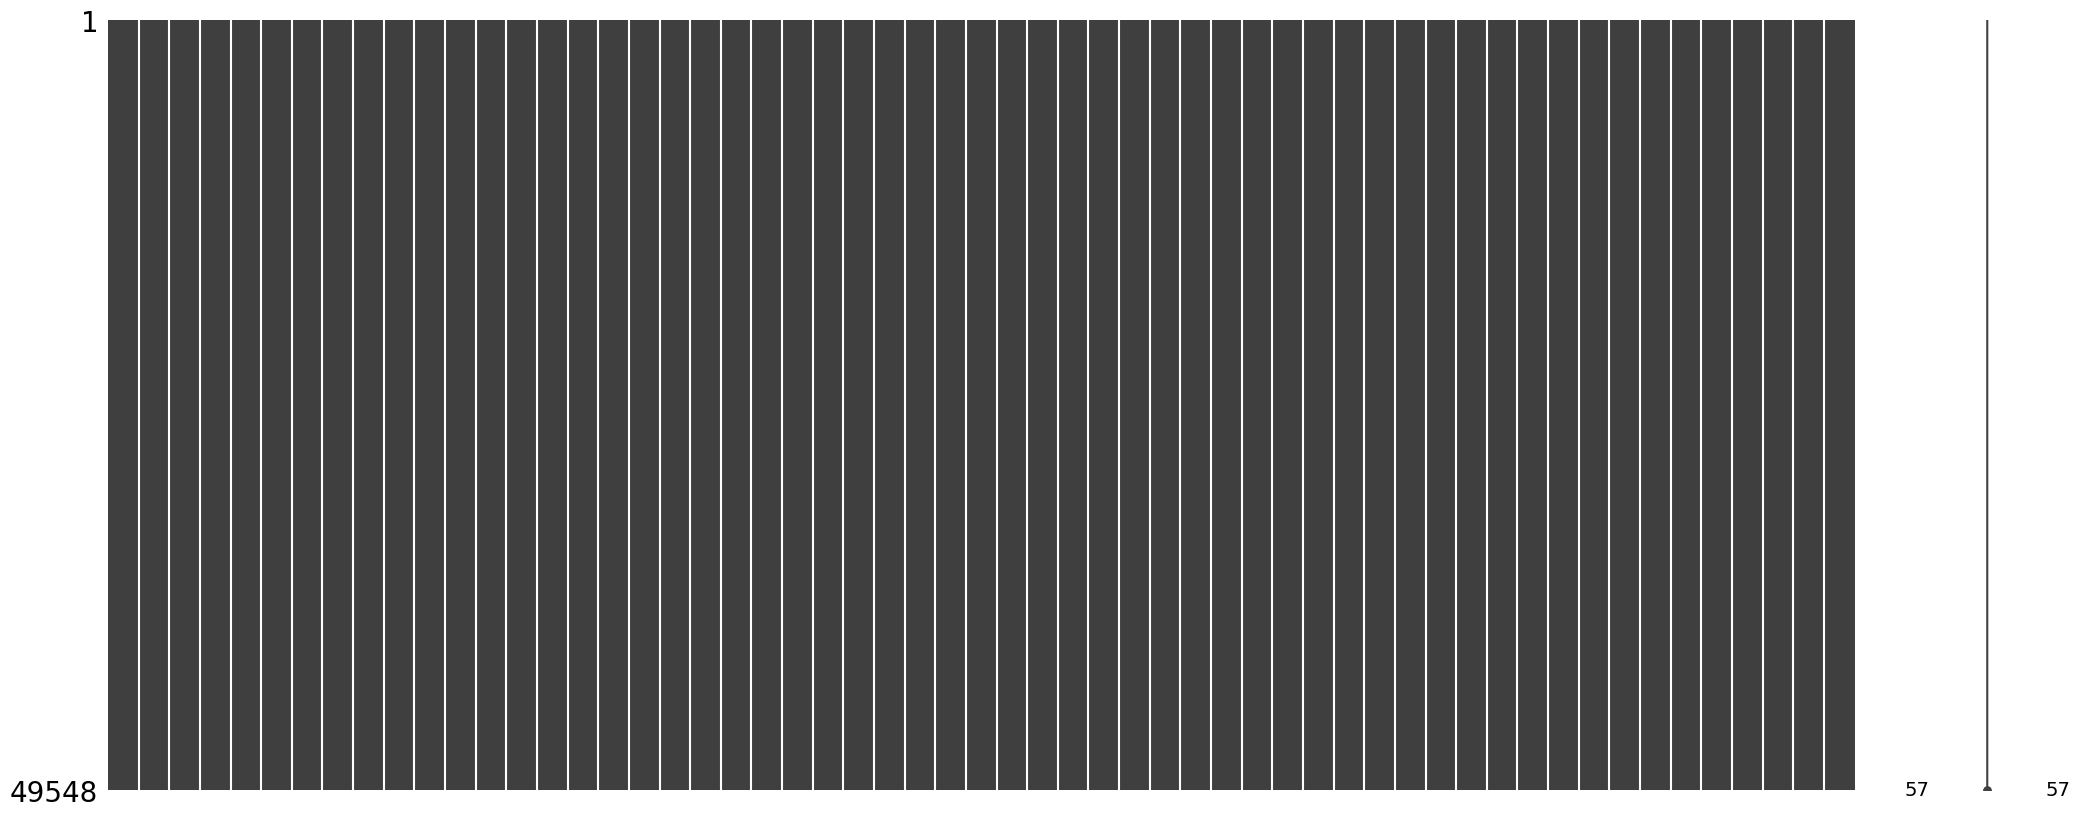

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      8.837730e+00
MI_dir_L5_mean        3.604590e+02
MI_dir_L5_variance    2.123254e+04
MI_dir_L3_weight      1.087688e+01
MI_dir_L3_mean        3.602757e+02
MI_dir_L3_variance    2.138792e+04
MI_dir_L1_weight      1.448867e+01
MI_dir_L1_mean        3.600920e+02
MI_dir_L1_variance    2.036233e+04
H_L5_weight           8.837730e+00
H_L5_mean             3.604590e+02
H_L5_variance         2.123254e+04
H_L3_weight           1.087688e+01
H_L3_mean             3.602755e+02
H_L3_variance         2.138792e+04
H_L1_weight           1.448867e+01
H_L1_mean             3.600636e+02
H_L1_variance         2.036233e+04
HH_L5_weight          3.008351e+00
HH_L5_mean            3.604590e+02
HH_L5_std             1.457139e+02
HH_L5_covariance      3.591896e+03
HH_L5_pcc             4.915614e-01
HH_L3_weight          3.743871e+00
HH_L3_mean            3.602755e+02
HH_L3_std             1.462478e+02
HH_L3_covariance      3.898882e+03
HH_L3_pcc             

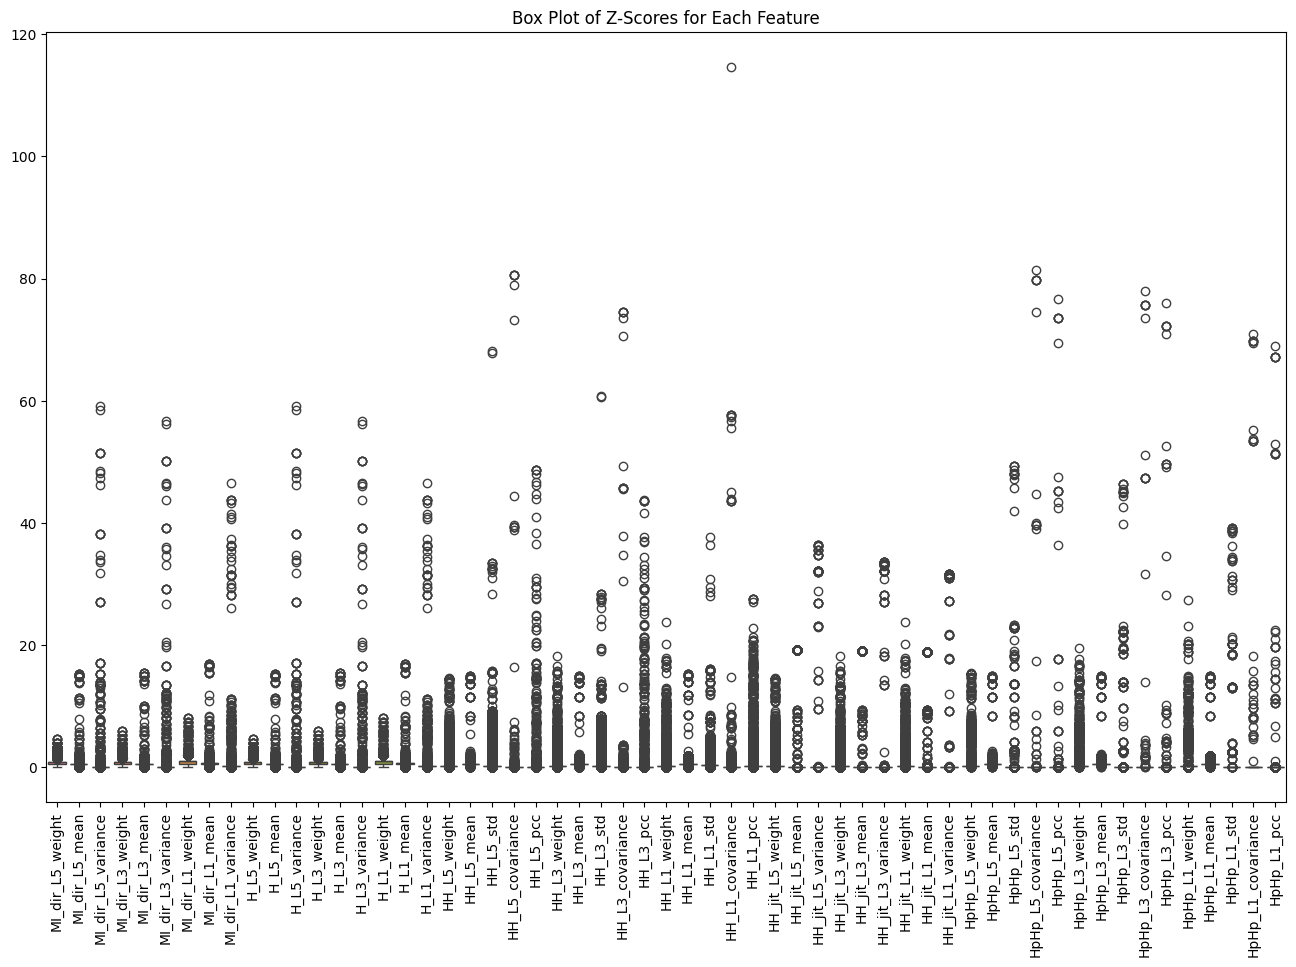

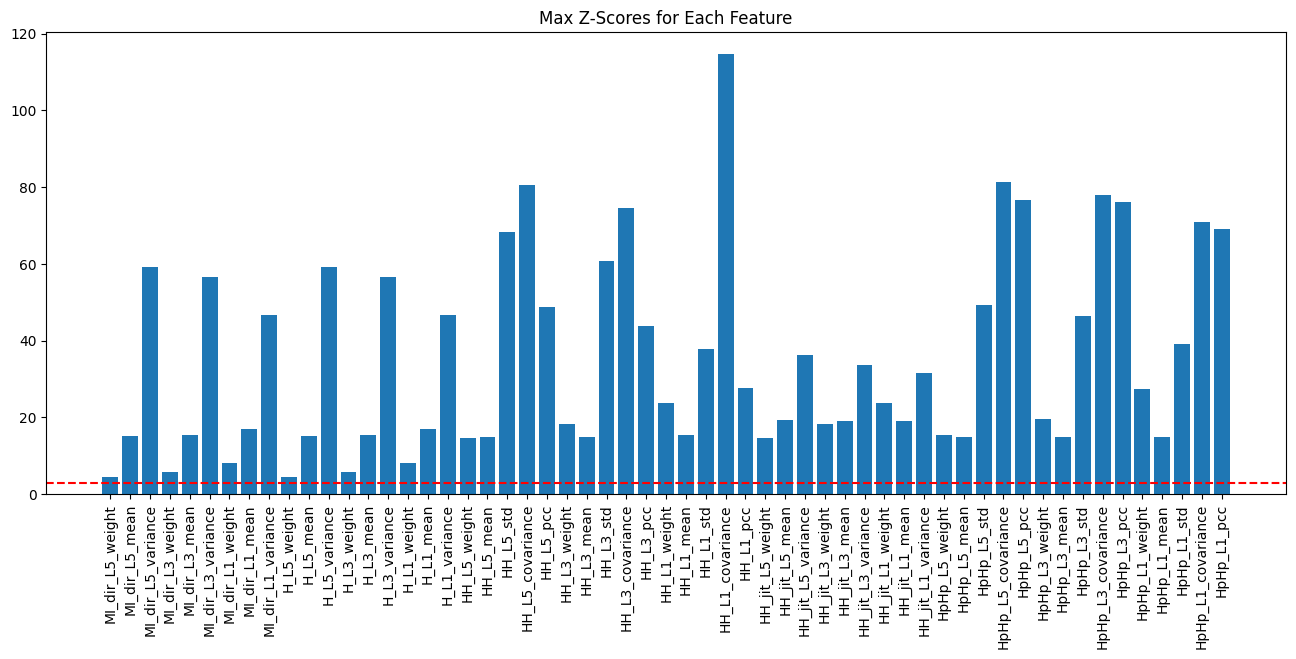

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 2484


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      354.000000            0.000000          1.000000   
2          1.857879      360.458980           35.789338          1.912127   
3          1.000000      337.000000            0.000000          1.000000   
4          1.680223      172.140917        18487.448750          1.793580   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      354.000000            0.000000          1.000000      354.000000   
2      360.275733           35.923972          1.969807      360.091968   
3      337.000000            0.000000          1.000000      337.000000   
4      182.560279        18928.175300          1.925828      193.165753   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000     60.000000   
1            0.000000     1.000000  ...        1.000032    353.999619   
2           35.991542     1.857879  ...        1.912156    360.275456   
3            0.000000     1.000000  ...        1.000000    337.000000   
4        19153.795810     1.680223  ...        1.000000     60.000000   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.067642                 0.0          0.0        1.031757    353.630645   
2     5.994038                 0.0          0.0        2.000605    359.813452   
3     0.000000                 0.0          0.0        1.000000    337.000000   
4     0.000000                 0.0          0.0        1.000000     60.000000   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     2.072641                 0.0          0.0  
2     6.356005                 0.0          0.0  
3     0.000000                 0.0          0.0  
4     0.000000                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight        26
MI_dir_L5_mean          38
MI_dir_L5_variance     100
MI_dir_L3_weight        42
MI_dir_L3_mean          39
MI_dir_L3_variance     102
MI_dir_L1_weight        57
MI_dir_L1_mean          43
MI_dir_L1_variance     140
H_L5_weight             26
H_L5_mean               38
H_L5_variance          100
H_L3_weight             42
H_L3_mean               39
H_L3_variance          102
H_L1_weight             57
H_L1_mean               43
H_L1_variance          140
HH_L5_weight          1055
HH_L5_mean              35
HH_L5_std              463
HH_L5_covariance        30
HH_L5_pcc              121
HH_L3_weight          1144
HH_L3_mean              35
HH_L3_std              669
HH_L3_covariance        36
HH_L3_pcc              186
HH_L1_weight          1485
HH_L1_mean              35
HH_L1_std             1049
HH_L1_covariance        44
HH_L1_pcc              369
HH_jit_L5_weight      1055
HH_jit_L5_mean         175
HH_jit_L5_variance     

Number of outliers per feature:
MI_dir_L5_weight        26
MI_dir_L5_mean          38
MI_dir_L5_variance     100
MI_dir_L3_weight        42
MI_dir_L3_mean          39
MI_dir_L3_variance     102
MI_dir_L1_weight        57
MI_dir_L1_mean          43
MI_dir_L1_variance     140
H_L5_weight             26
H_L5_mean               38
H_L5_variance          100
H_L3_weight             42
H_L3_mean               39
H_L3_variance          102
H_L1_weight             57
H_L1_mean               43
H_L1_variance          140
HH_L5_weight          1055
HH_L5_mean              35
HH_L5_std              463
HH_L5_covariance        30
HH_L5_pcc              121
HH_L3_weight          1144
HH_L3_mean              35
HH_L3_std              669
HH_L3_covariance        36
HH_L3_pcc              186
HH_L1_weight          1485
HH_L1_mean              35
HH_L1_std             1049
HH_L1_covariance        44
HH_L1_pcc              369
HH_jit_L5_weight      1055
HH_jit_L5_mean         175
HH_jit_L5_variance     

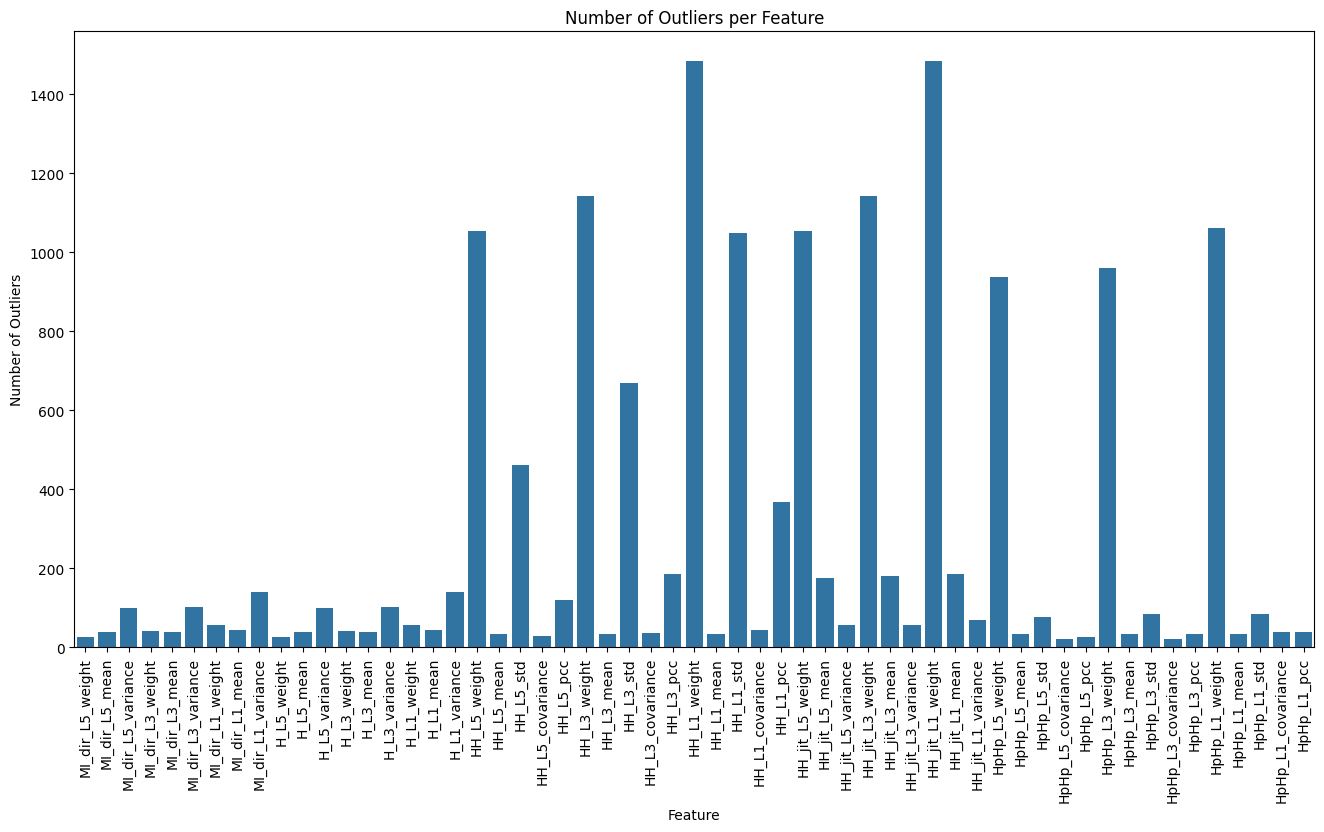

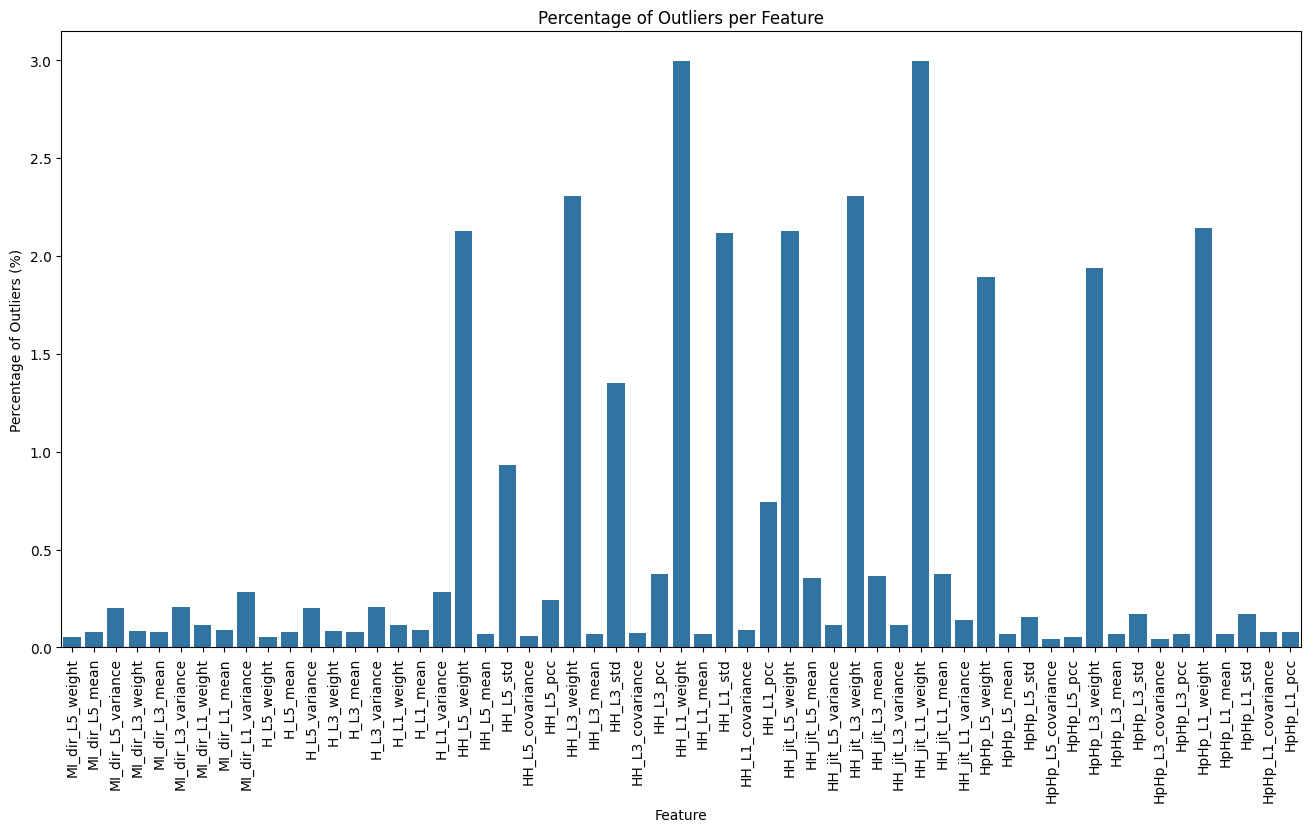

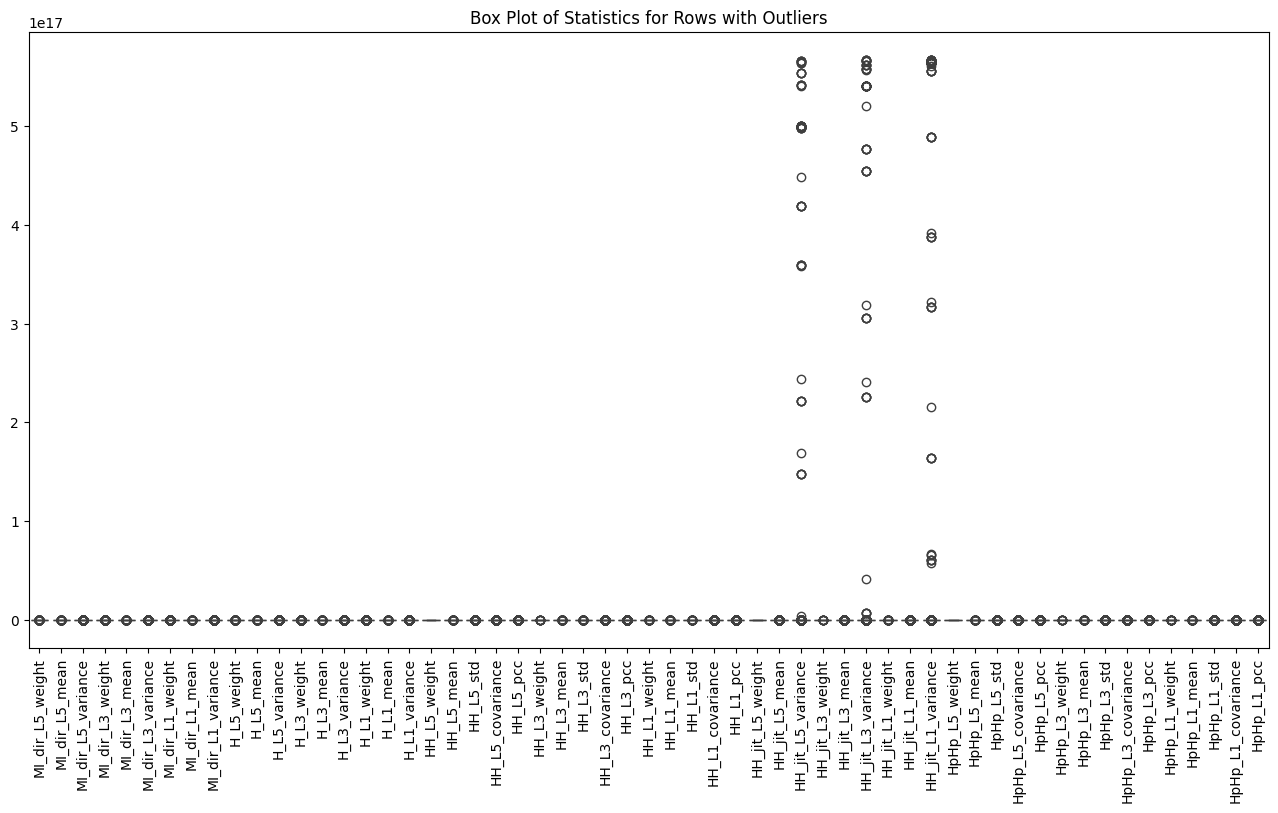

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (49548, 57)
Cleaned dataset shape: (47064, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
25          1.000000       98.000000        4.350000e-09          1.000000   
26          1.006472       75.147904        3.379909e+00          1.048600   
33          1.000000       98.000000        0.000000e+00          1.000000   
34          1.973326      100.027035        3.999269e+00          1.983909   
35          2.973270      100.690602        3.523069e+00          2.983876   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
25       97.999998            0.000600          1.045673       97.690803   
26       76.065983           23.381305          1.381598       81.267216   
33       98.000000            0.000000          1.000000       98.000000   
34      100.016222            3.999737          1.994607      100.005407   
35      100.681054            3.536165  

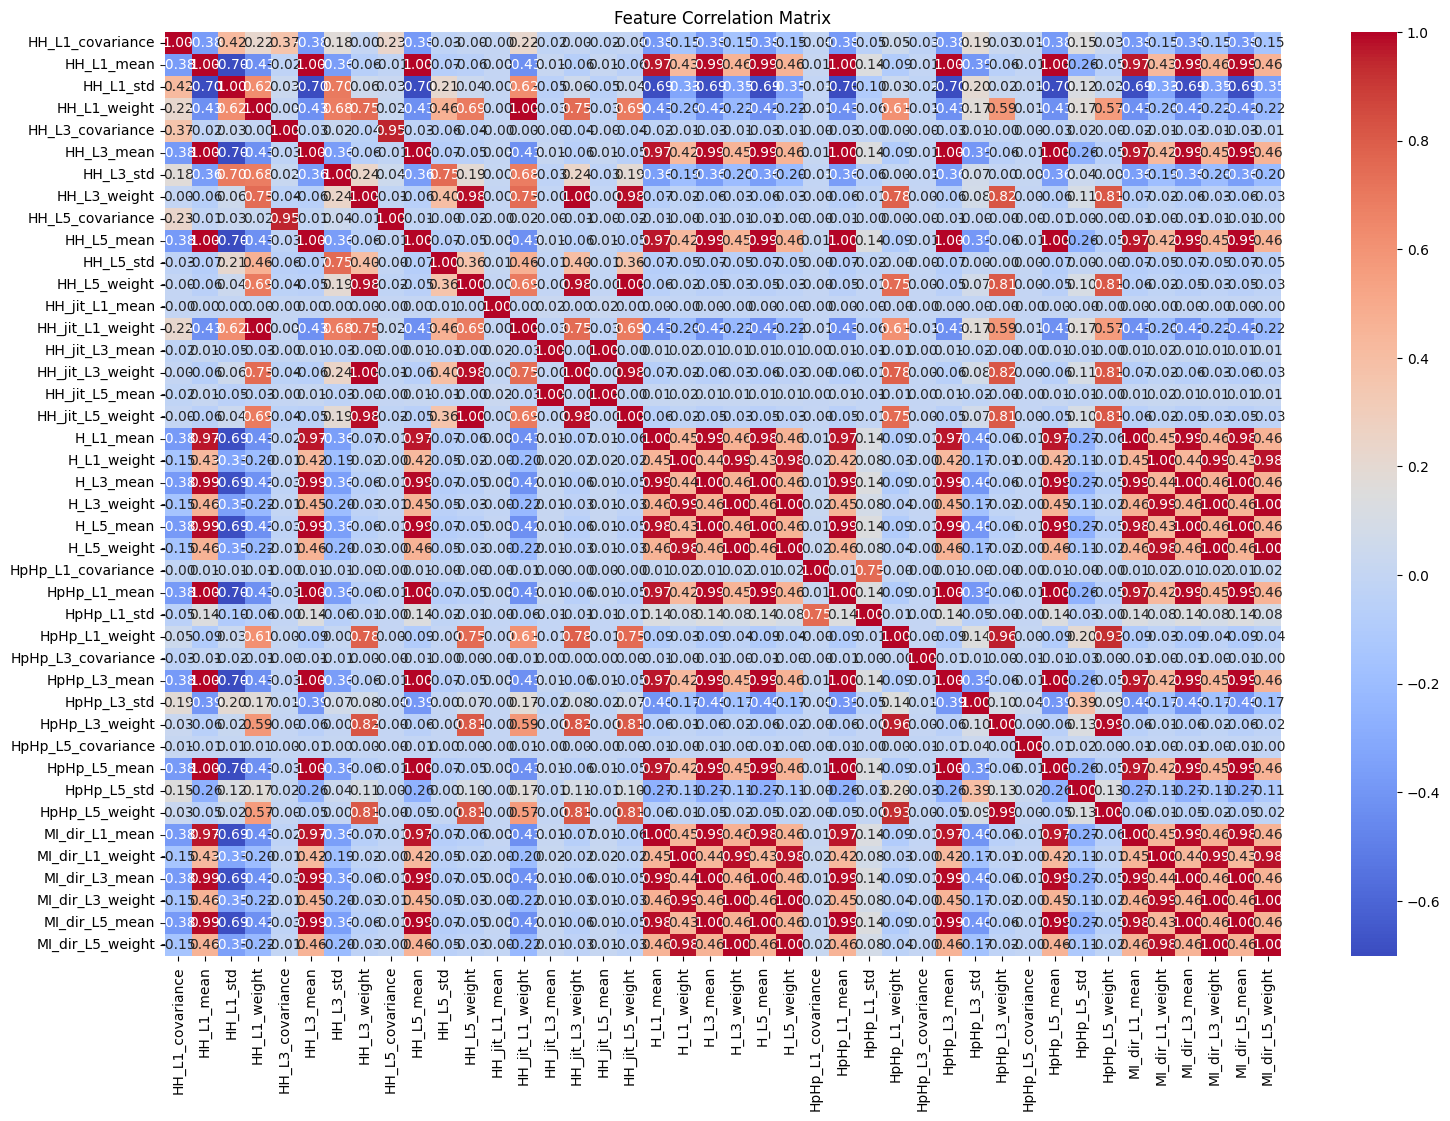

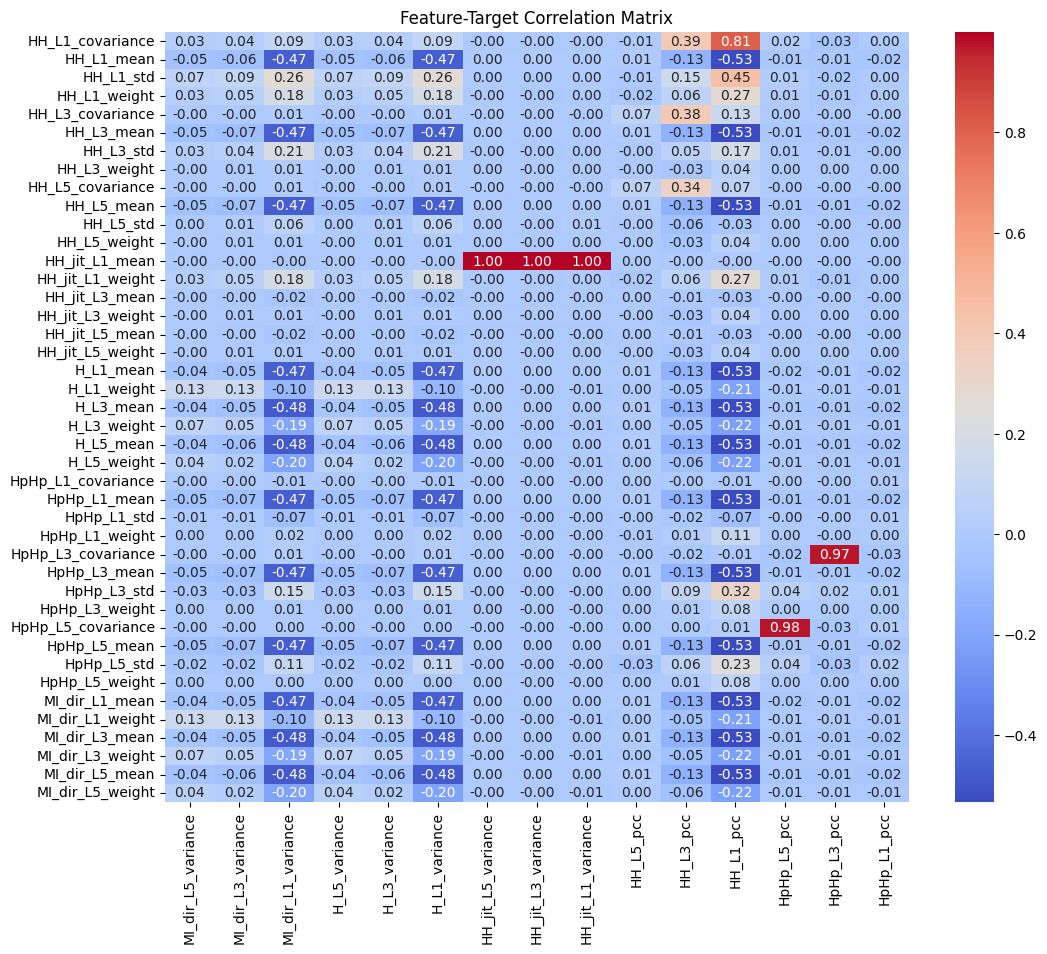

Descriptive Statistics for Features:
       HH_L1_covariance    HH_L1_mean     HH_L1_std  HH_L1_weight  \
count      4.706400e+04  47064.000000  47064.000000  47064.000000   
mean       6.854205e-02     93.408121      0.973246      1.005827   
std        3.807127e-01     15.926548      2.339754      0.022550   
min       -1.073359e+01     60.000000      0.000000      1.000000   
25%       -8.820000e-75     97.999989      0.000000      1.000000   
50%        0.000000e+00    102.000000      0.000001      1.000000   
75%        1.920000e-51    102.000000      0.006503      1.000000   
max        1.487110e+01    102.000000     12.873130      1.565926   

       HH_L3_covariance    HH_L3_mean     HH_L3_std  HH_L3_weight  \
count      4.706400e+04  47064.000000  47064.000000  47064.000000   
mean       3.346512e-07     93.290210      0.038523      1.000146   
std        3.652798e-05     16.229835      0.161594      0.003712   
min       -2.452914e-03     60.000000      0.000000      1.000000

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance  HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000    1.375349   0.579793      0.780324   
HH_L1_mean                  1.375349    0.000000   1.697859      1.428743   
HH_L1_std                   0.579793    1.697859   0.000000      0.377369   
HH_L1_weight                0.780324    1.428743   0.377369      0.000000   
HH_L3_covariance            0.631858    1.024512   0.965317      0.999636   
HH_L3_mean                  1.381661    0.000328   1.701591      1.428168   
HH_L3_std                   0.824297    1.364366   0.302543      0.315634   
HH_L3_weight                0.998775    1.064518   0.944777      0.252661   
HH_L5_covariance            0.767441    1.012183   0.973079      0.977534   
HH_L5_mean                  1.381733    0.000339   1.701563      1.428059   
HH_L5_std                   1.025751    1.072358   0.785274      0.537471   
HH_L5_weight                1.000260    1.055388   0.963466

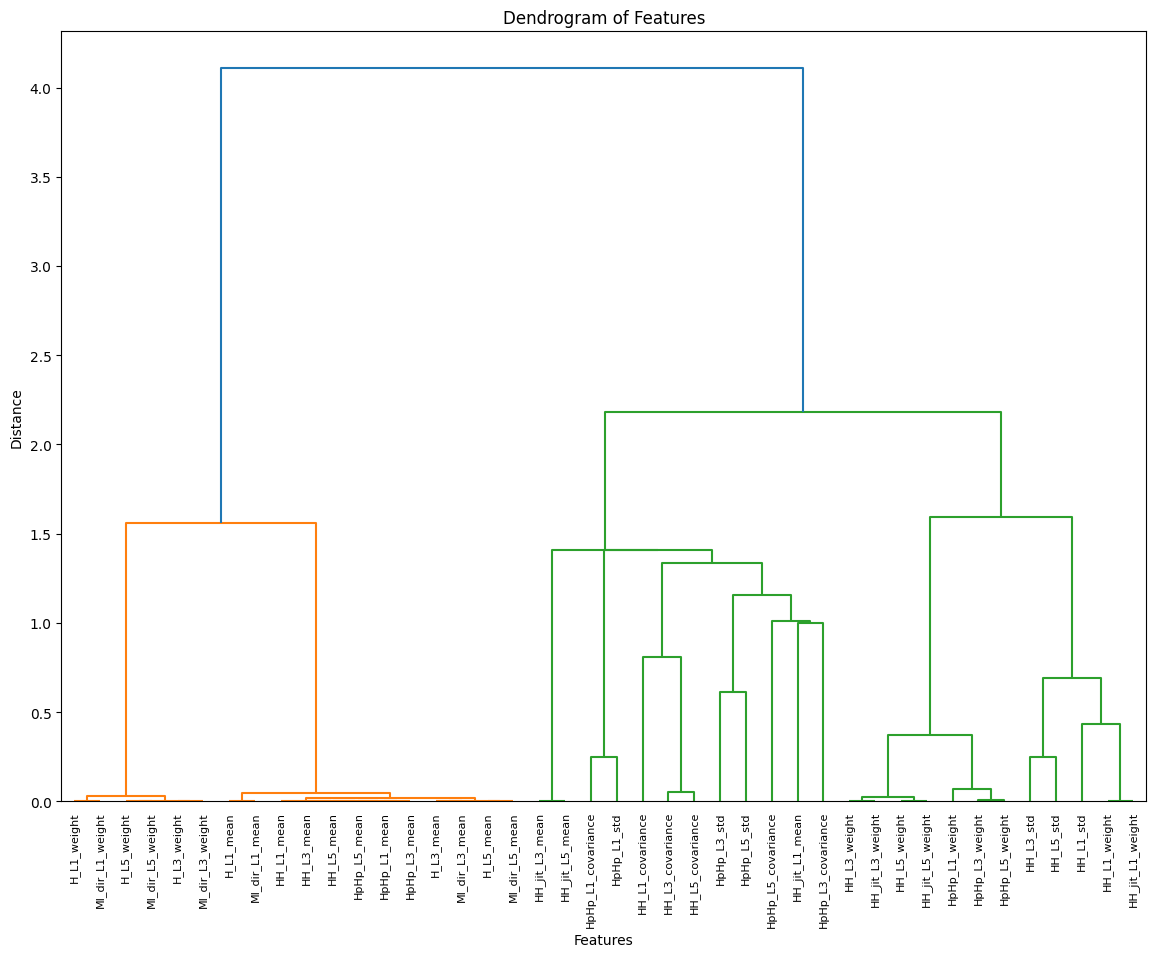

Cluster Summary:
   Cluster                                            Feature
0        1  [HH_L1_mean, HH_L3_mean, HH_L5_mean, H_L1_mean...
1        2  [HH_L1_covariance, HH_L3_covariance, HH_L5_cov...
2        3  [HH_L1_std, HH_L1_weight, HH_L3_std, HH_L3_wei...


In [ ]:
from scipy.spatial.distance import squareform
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)
# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')
print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=feature_columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        2
1           HH_L1_mean        1
2            HH_L1_std        3
3         HH_L1_weight        3
4     HH_L3_covariance        2
5           HH_L3_mean        1
6            HH_L3_std        3
7         HH_L3_weight        3
8     HH_L5_covariance        2
9           HH_L5_mean        1
10           HH_L5_std        3
11        HH_L5_weight        3
12      HH_jit_L1_mean        2
13    HH_jit_L1_weight        3
14      HH_jit_L3_mean        2
15    HH_jit_L3_weight        3
16      HH_jit_L5_mean        2
17    HH_jit_L5_weight        3
18           H_L1_mean        1
19         H_L1_weight        1
20           H_L3_mean        1
21         H_L3_weight        1
22           H_L5_mean        1
23         H_L5_weight        1
24  HpHp_L1_covariance        2
25        HpHp_L1_mean        1
26         HpHp_L1_std        2
27      HpHp_L1_weight        3
28  HpHp_L3_covariance        2
29        HpHp_L3_mean        1
30      

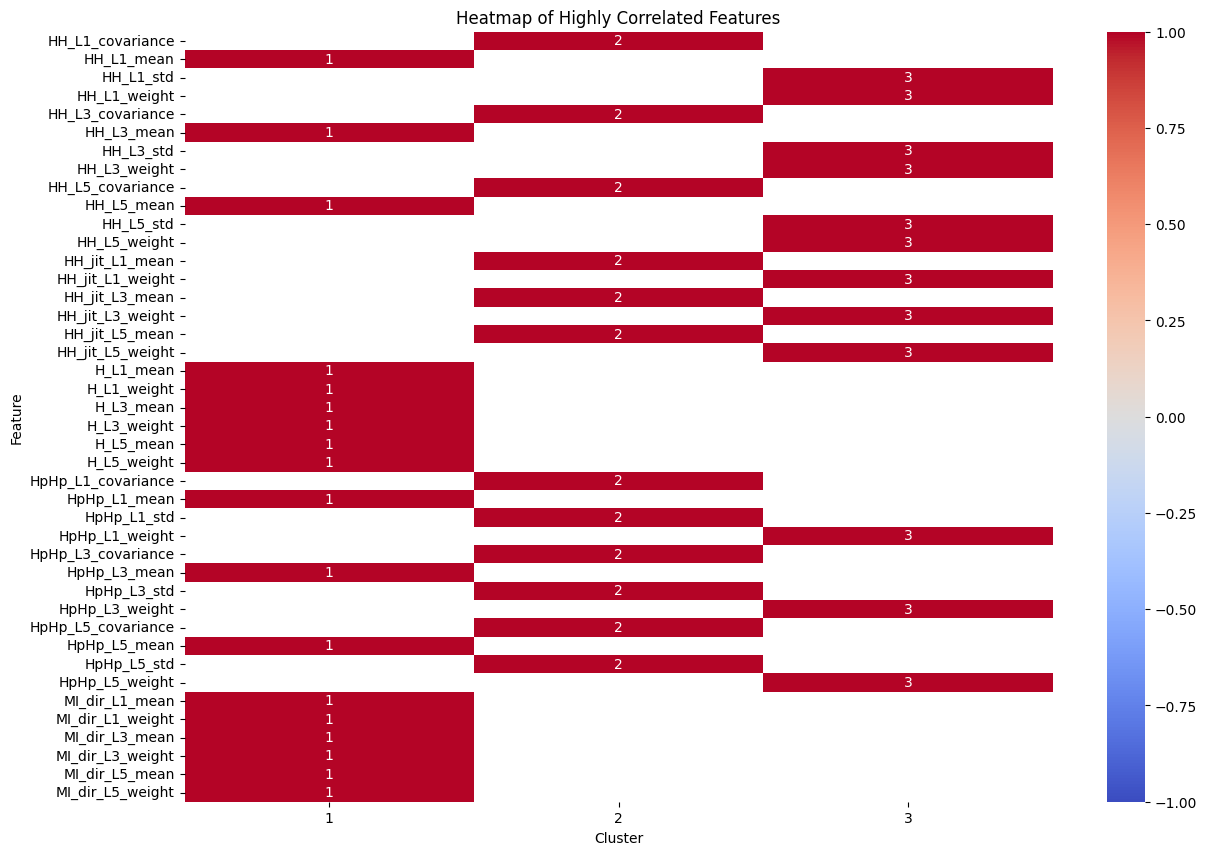

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

Spliting the data into training, validation, test

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.23282578 0.20378895 0.23831445 0.22631486 0.22826279]
Mean Cross-Validation Accuracy: 0.22590136606415903
Validation Set Performance:
Accuracy: 0.23229461756373937
Precision: 0.34202653828008156
Recall: 0.43599904283321367
F1-Score: 0.14129139469570007
Test Set Performance:
Accuracy: 0.2389937106918239
Precision: 0.34525434809653127
Recall: 0.49655442999321825
F1-Score: 0.14897558173664763

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.23707507 0.23672096 0.24398017 0.24225252 0.22967948]
Mean Cross-Validation Accuracy: 0.23794164065153298
Validation Set Performance:
Accuracy: 0.23739376770538242
Precision: 0.3501277150833188
Recall: 0.4609832479192513
F1-Score: 0.15669857379525484
Test Set Performance:
Accuracy: 0.24281828998810132
Precision: 0.35269768297384463
Recall: 0.4938424592487116
F1-Score: 0.162299638732370

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, 

Cross-Validation Accuracy Scores: [0.96033994 0.95325779        nan 0.9534266  0.95749956]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.9580736543909348
Precision: 0.4999260901699926
Recall: 0.4791046890494404
F1-Score: 0.4892939814814815
Test Set Performance:
Accuracy: 0.9568247492775794
Precision: 0.3339032849149461
Recall: 0.4301328194373595
F1-Score: 0.32728780767600385

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call las

Cross-Validation Accuracy Scores: [0.96033994 0.95325779        nan 0.9534266  0.95749956]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.9584985835694051
Precision: 0.5033898305084745
Recall: 0.9792434117313686
F1-Score: 0.49613572850207444
Test Set Performance:
Accuracy: 0.957164711881693
Precision: 0.5019762845849802
Recall: 0.9785787147228834
F1-Score: 0.492991907109596

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, 

Cross-Validation Accuracy Scores: [0.96033994 0.95325779        nan 0.9534266  0.95749956]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.9584985835694051
Precision: 0.5033898305084745
Recall: 0.9792434117313686
F1-Score: 0.49613572850207444
Test Set Performance:
Accuracy: 0.957164711881693
Precision: 0.5019762845849802
Recall: 0.9785787147228834
F1-Score: 0.492991907109596

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, 

Cross-Validation Accuracy Scores: [0.86986544 0.87871813        nan 0.86470692 0.86665486]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.12917847025495752
Precision: 0.4994523548740416
Recall: 0.06459838504037399
F1-Score: 0.11440040140491721
Test Set Performance:
Accuracy: 0.12077171511133775
Precision: 0.49964838255977495
Recall: 0.06039099022524437
F1-Score: 0.10775764010009858

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.81621813 0.83870397 0.96441218 0.81051886 0.81530016]
Mean Cross-Validation Accuracy: 0.849030659313702
Validation Set Performance:
Accuracy: 0.13824362606232293
Precision: 0.33425923040162897
Recall: 0.3793803721545292
F1-Score: 0.08343140139256645
Test Set Performance:
Accuracy: 0.13173550909399967
Precision: 0.3333333333333333
Recall: 0.043915568777447234
F1-Score: 0.07760670922518463

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.80842776 0.81958215 0.80524079 0.80467505 0.8052063 ]
Mean Cross-Validation Accuracy: 0.8086264122292114
Validation Set Performance:
Accuracy: 0.014447592067988669
Precision: 0.3346703994370248
Recall: 0.3374164242331445
F1-Score: 0.018795232833152847
Test Set Performance:
Accuracy: 0.0135985041645419
Precision: 0.3337000366703337
Recall: 0.33709432817713075
F1-Score: 0.018563292512907673

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.80949008 0.82082153 0.81143768 0.80626882 0.8099876 ]
Mean Cross-Validation Accuracy: 0.8116011422244809
Validation Set Performance:
Accuracy: 0.8084985835694051
Precision: 0.3394852772178671
Recall: 0.5200217988816226
F1-Score: 0.3103346067355797
Test Set Performance:
Accuracy: 0.8188849226585075
Precision: 0.3434024703333778
Recall: 0.6621721567958126
F1-Score: 0.3199304918704425

--------------------------------------------------

Trai

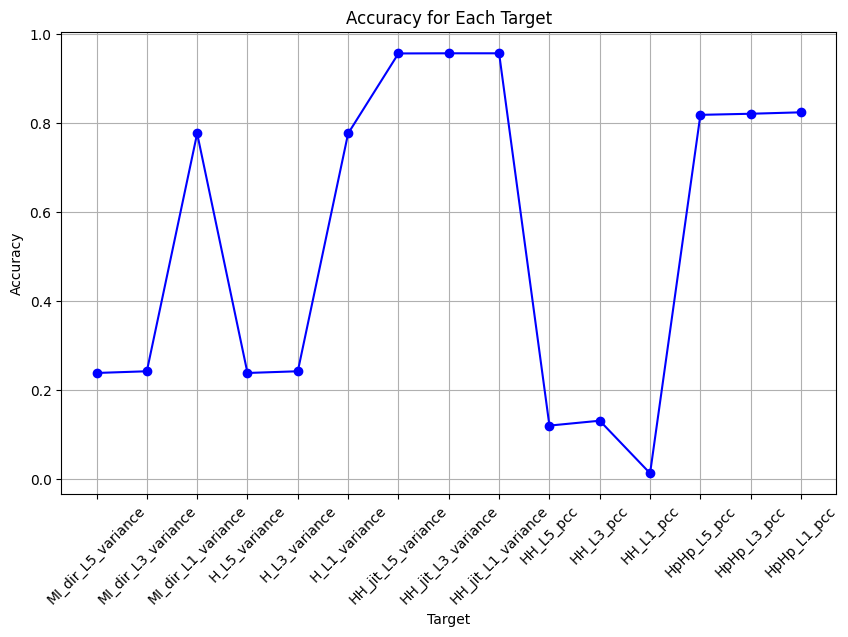

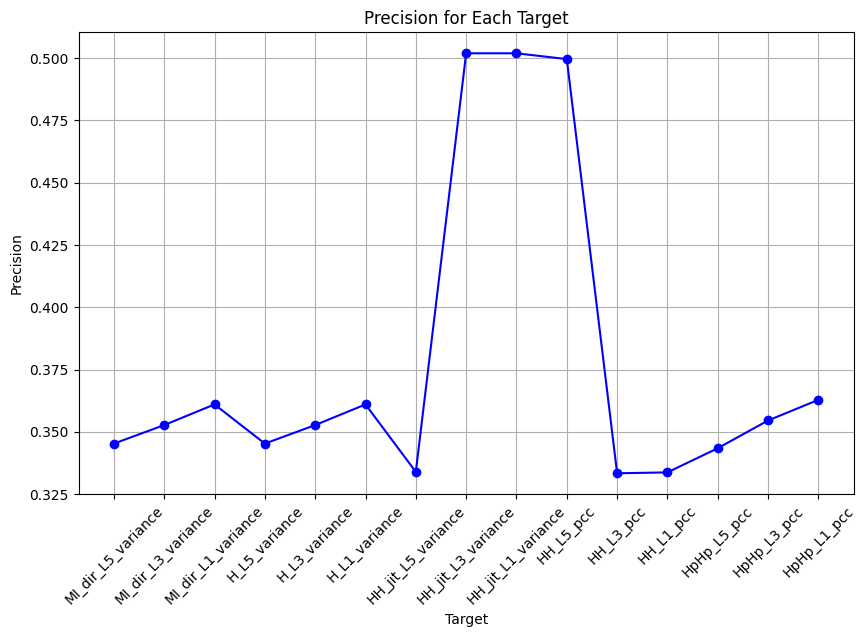

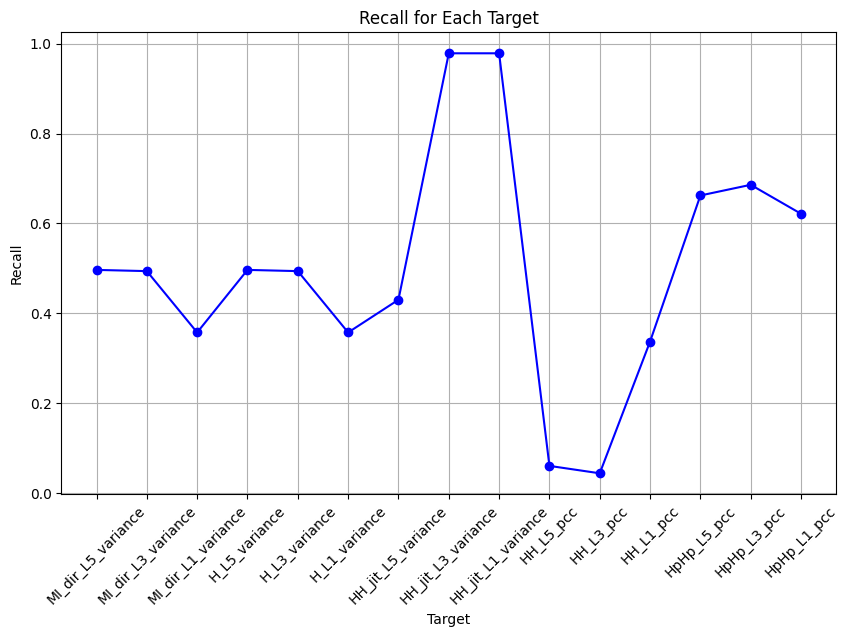

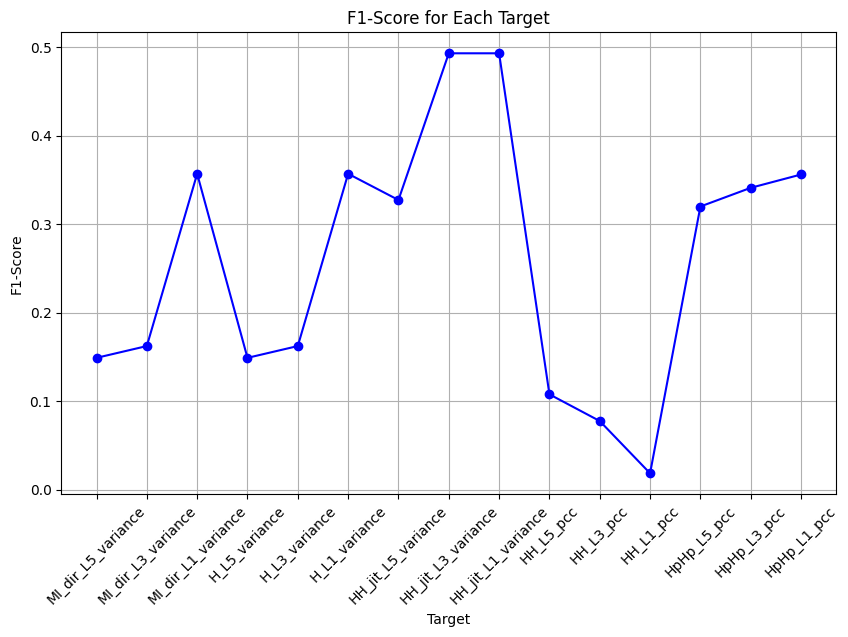

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the SVM model for classification
    model = SVC(kernel='rbf', class_weight='balanced')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.9865439093484419
Precision: 0.328847969782814
Recall: 0.3333333333333333
F1-Score: 0.3310754604872252
Test Set Performance:
Accuracy: 0.985041645419004
Precision: 0.32834721513966797
Recall: 0.3333333333333333
F1-Score: 0.3308214876976651

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.9757790368271955
Precision: 0.3252596789423985
Recall: 0.3333333333333333
F1-Score: 0.3292470189021913
Test Set Performance:
Accuracy: 0.9756926738058813
Precision: 0.3252308912686271
Recall: 0.3333333333333333
F1-Score: 0.3292322693509994

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.9688385269121813
Precision: 0.32294617563739375
Recall: 0.3333333333333333
F1-Score: 0.3280575539568345
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

Accuracy: 0.8639299677035526
Precision: 0.2879766559011842
Recall: 0.3333333333333333
F1-Score: 0.308999437630143

--------------------------------------------------

Training model for target: H_L5_variance
Validation Set Performance:
Accuracy: 0.9865439093484419
Precision: 0.328847969782814
Recall: 0.3333333333333333
F1-Score: 0.3310754604872252
Test Set Performance:
Accuracy: 0.985041645419004
Precision: 0.32834721513966797
Recall: 0.3333333333333333
F1-Score: 0.3308214876976651

--------------------------------------------------

Training model for target: H_L3_variance
Validation Set Performance:
Accuracy: 0.9757790368271955
Precision: 0.3252596789423985
Recall: 0.3333333333333333
F1-Score: 0.3292470189021913
Test Set Performance:
Accuracy: 0.9756926738058813
Precision: 0.3252308912686271
Recall: 0.3333333333333333
F1-Score: 0.3292322693509994

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accuracy: 0.96883

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

Accuracy: 0.9277620396600567
Precision: 0.3333333333333333
Recall: 0.30929782310997783
F1-Score: 0.32086609351654544
Test Set Performance:
Accuracy: 0.928607853136155
Precision: 0.24997712089320032
Recall: 0.2322309131100153
F1-Score: 0.24077746925823085

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Validation Set Performance:
Accuracy: 0.9274787535410765
Precision: 0.3332315521628499
Recall: 0.3092471899499386
F1-Score: 0.3207916911620615
Test Set Performance:
Accuracy: 0.9285228624851266
Precision: 0.33327232238186755
Recall: 0.30956024028108353
F1-Score: 0.3209789490693814

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Performance:
Accuracy: 0.9274787535410765
Precision: 0.3332315521628499
Recall: 0.3092471899499386
F1-Score: 0.3207916911620615
Test Set Performance:
Accuracy: 0.9285228624851266
Precision: 0.33327232238186755
Recall: 0.30956024028108353
F1-Score: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Accuracy: 8.499065102838688e-05
Precision: 8.771929824561403e-05
Recall: 0.3333333333333333
F1-Score: 0.00017539244058581077

--------------------------------------------------

Training model for target: HH_L3_pcc
Validation Set Performance:
Accuracy: 0.00014164305949008498
Precision: 5.0454086781029264e-05
Recall: 0.25
F1-Score: 0.00010088781275221954
Test Set Performance:
Accuracy: 8.499065102838688e-05
Precision: 4.03648986841043e-05
Recall: 0.3333333333333333
F1-Score: 8.072002260160632e-05

--------------------------------------------------

Training model for target: HH_L1_pcc
Validation Set Performance:
Accuracy: 0.07294617563739376
Precision: 0.47246596554616427
Recall: 0.3513248129560274
F1-Score: 0.16987503429247694
Test Set Performance:
Accuracy: 0.06493285738568758
Precision: 0.5157580919931857
Recall: 0.40974497017490646
F1-Score: 0.22460818190071435

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Validation Set Performance:
Acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-

Accuracy: 0.9959204487506375
Precision: 0.33197348291687917
Recall: 0.3333333333333333
F1-Score: 0.33265201839550335

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Validation Set Performance:
Accuracy: 0.9937677053824363
Precision: 0.33125590179414544
Recall: 0.3333333333333333
F1-Score: 0.332291370654542
Test Set Performance:
Accuracy: 0.9923508414074452
Precision: 0.3307836138024817
Recall: 0.3333333333333333
F1-Score: 0.3320535790461565

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Validation Set Performance:
Accuracy: 0.9854107648725212
Precision: 0.3284702549575071
Recall: 0.3333333333333333
F1-Score: 0.33088392666048366
Test Set Performance:
Accuracy: 0.9839367669556349
Precision: 0.327978922318545
Recall: 0.3333333333333333
F1-Score: 0.33063445144154563

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.7648195365176498
Average Precisi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


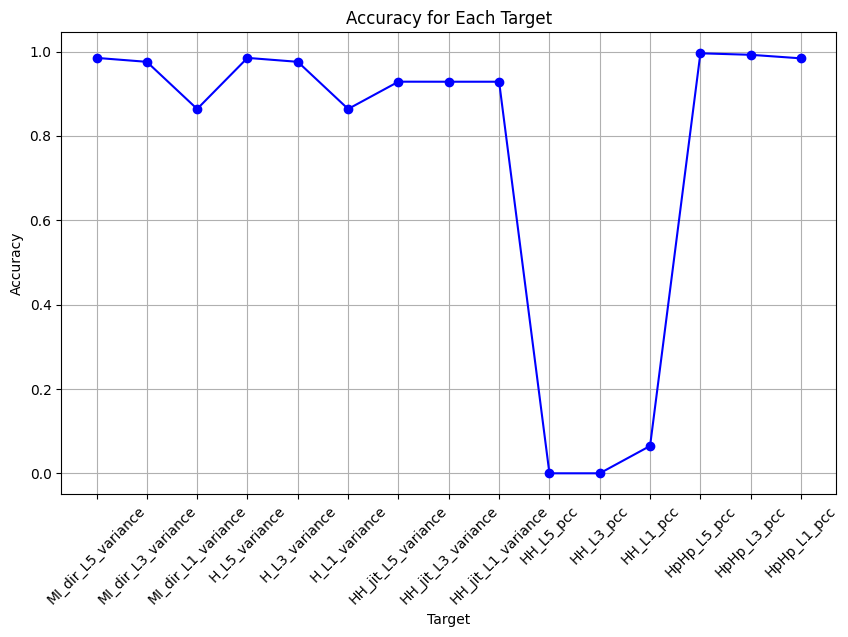

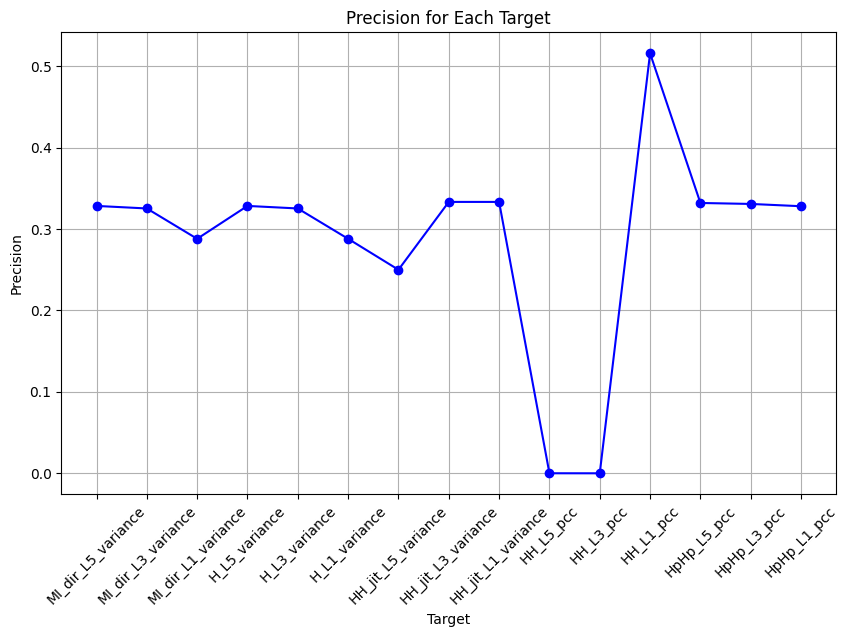

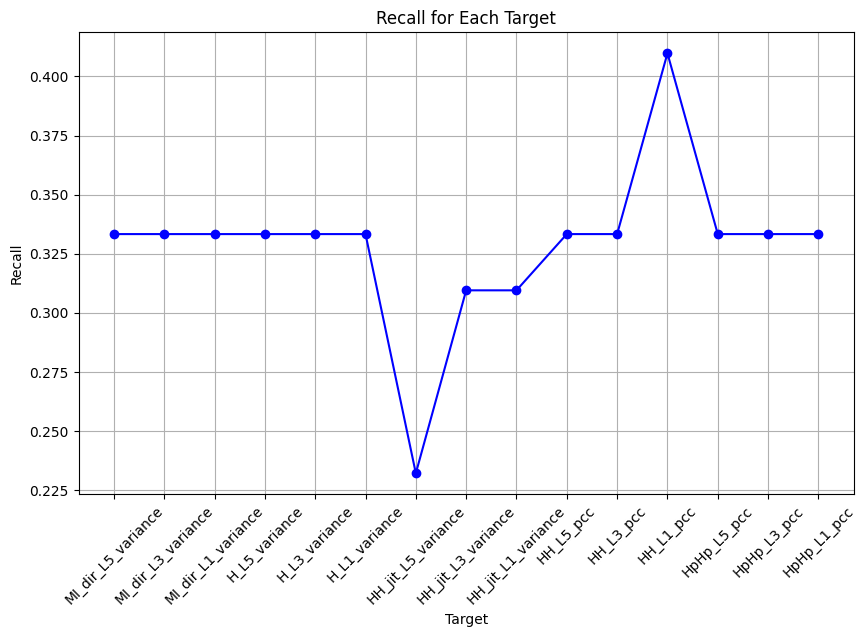

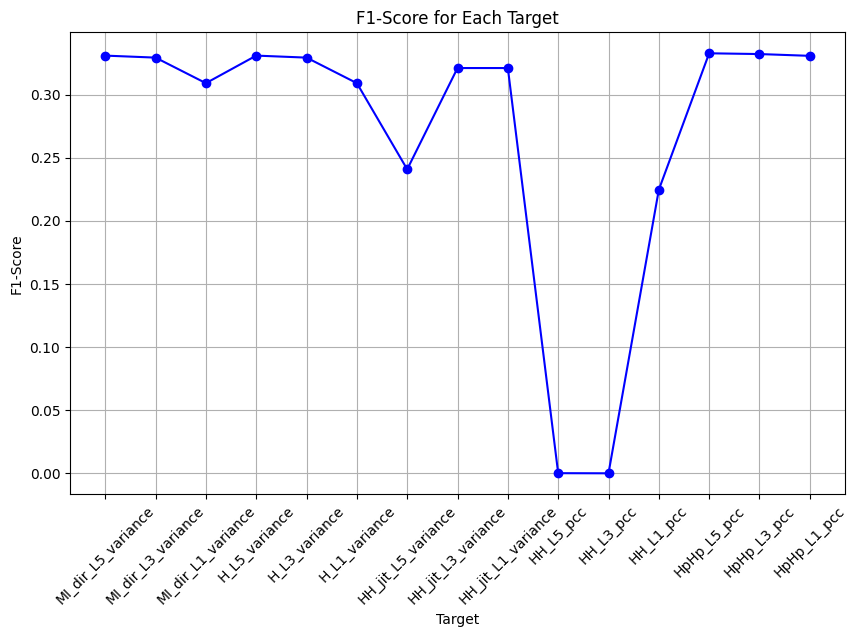

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.98477337 0.98548159 0.98583569 0.98512485 0.98601027]
Mean Cross-Validation Accuracy: 0.985445153509773
Validation Set Performance:
Accuracy: 0.9856940509915014
Precision: 0.34673712583345156
Recall: 0.25971284996410626
F1-Score: 0.2663978878264593
Test Set Performance:
Accuracy: 0.9843617202107768
Precision: 0.31779058317225284
Recall: 0.2550474547023296
F1-Score: 0.25786527283892435

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9746813  0.97538952 0.9766289  0.97573933 0.97627059]
Mean Cross-Validation Accuracy: 0.9757419266967695
Validation Set Performance:
Accuracy: 0.9746458923512747
Precision: 0.355288074610614
Recall: 0.2602028210251928
F1-Score: 0.266258825333324
Test Set Performance:
Accuracy: 0.9744178140404556
Precision: 0.3065800681431005
Recall: 0.254509974721596
F1-Score: 0.25590400125283846

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.98495042 0.98335694 0.98264873 0.98353108 0.98388525]
Mean Cross-Validation Accuracy: 0.9836744835809934
Validation Set Performance:
Accuracy: 0.9677053824362606
Precision: 0.2959064179255804
Recall: 0.2530383201888513
F1-Score: 0.2523783728409472
Test Set Performance:
Accuracy: 0.8625701172870984
Precision: 0.28803746275010644
Recall: 0.33280865715691094
F1-Score: 0.3088087631218622

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.98477337 0.98548159 0.98583569 0.98512485 0.98601027]
Mean Cross-Validation Accuracy: 0.985445153509773
Validation Set Performance:
Accuracy: 0.9856940509915014
Precision: 0.34673712583345156
Recall: 0.25971284996410626
F1-Score: 0.2663978878264593
Test Set Performance:
Accuracy: 0.9843617202107768
Precision: 0.31779058317225284
Recall: 0.2550474547023296
F1-Score: 0.25786527283892435

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9746813  0.97538952 0.9766289  0.97573933 0.97627059]
Mean Cross-Validation Accuracy: 0.9757419266967695
Validation Set Performance:
Accuracy: 0.9746458923512747
Precision: 0.355288074610614
Recall: 0.2602028210251928
F1-Score: 0.266258825333324
Test Set Performance:
Accuracy: 0.9744178140404556
Precision: 0.3065800681431005
Recall: 0.254509974721596
F1-Score: 0.25590400125283846

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.98495042 0.98335694 0.98264873 0.98353108 0.98388525]
Mean Cross-Validation Accuracy: 0.9836744835809934
Validation Set Performance:
Accuracy: 0.9677053824362606
Precision: 0.2959064179255804
Recall: 0.2530383201888513
F1-Score: 0.2523783728409472
Test Set Performance:
Accuracy: 0.8625701172870984
Precision: 0.28803746275010644
Recall: 0.33280865715691094
F1-Score: 0.3088087631218622

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated

Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.99985835694051
Precision: 0.499929178470255
Recall: 0.5
F1-Score: 0.4999645867271053
Test Set Performance:
Accuracy: 0.9996600373958865
Precision: 0.3332200124652955
Recall: 0.3333333333333333
F1-Score: 0.3332766632664627

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.9997167138810198
Precision: 0.4998583569405099
Recall: 0.5
F1-Score: 0.4999291684374557
Test Set Performance:
Accuracy: 0.9998300186979432
Precision: 0.4999150093489716
Recall: 0.5
F1-Score: 0.49995750106247344

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.9997167138810198
Precision: 0.4998583569405099
Recall: 0.5
F1-Score: 0.4999291684374557
Test Set Performance:
Accuracy: 0.9998300186979432
Precision: 0.4999150093489716
Recall: 0.5
F1-Score: 0.49995750106247344

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.00014164305949008498
Precision: 7.082152974504249e-05
Recall: 0.5
F1-Score: 0.000141622999575131
Test Set Performance:
Accuracy: 8.499065102838688e-05
Precision: 4.249532551419344e-05
Recall: 0.5
F1-Score: 8.498342823149487e-05

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99982295 0.99982295 0.99982295 0.99982291 0.99982291]
Mean Cross-Validation Accuracy: 0.9998229336341943
Validation Set Performance:
Accuracy: 0.00014164305949008498
Precision: 4.721435316336166e-05
Recall: 0.3333333333333333
F1-Score: 9.441533305008733e-05
Test Set Performance:
Accuracy: 8.499065102838688e-05
Precision: 4.249532551419344e-05
Recall: 0.5
F1-Score: 8.498342823149487e-05

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99876062 0.99858357 0.99876062 0.99858332 0.99805206]
Mean Cross-Validation Accuracy: 0.9985480394965164
Validation Set Performance:
Accuracy: 0.07096317280453258
Precision: 0.017811433447098977
Recall: 0.2470414201183432
F1-Score: 0.03322721846398727
Test Set Performance:
Accuracy: 0.06178820329763726
Precision: 0.2654916353704336
Recall: 0.24529301822295452
F1-Score: 0.029188073654236986

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99716714 0.99716714 0.99699008 0.99698955 0.99716664]
Mean Cross-Validation Accuracy: 0.9970961103466405
Validation Set Performance:
Accuracy: 0.9961756373937677
Precision: 0.33210558624923264
Recall: 0.33328594446024074
F1-Score: 0.3326947184181272
Test Set Performance:
Accuracy: 0.995835458099609
Precision: 0.24900119007140428
Recall: 0.24997866530124593
F1-Score: 0.24948897027510433

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99291785 0.9930949  0.99256374 0.99273951 0.99291659]
Mean Cross-Validation Accuracy: 0.9928465175673011
Validation Set Performance:
Accuracy: 0.9927762039660056
Precision: 0.2842954434895411
Recall: 0.2589741965454622
F1-Score: 0.26385264003212205
Test Set Performance:
Accuracy: 0.9919258881523032
Precision: 0.28392765988478086
Recall: 0.25612153134635146
F1-Score: 0.259677990574005

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.98477337 0.98353399 0.98371105 0.98229148 0.98406233]
Mean Cross-Validation Accuracy: 0.9836744459566639
Validation Set Performance:
Accuracy: 0.9839943342776204
Precision: 0.3369390660592255
Recall: 0.29523560178707103
F1-Score: 0.3089332627098166
Test Set Performance:
Accuracy: 0.9820669726330103
Precision: 0.3040026642867455
Recall: 0.2666367321651431
F1-Score: 0.27439192764169684

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.7782537254235369
Average Precision: 0.28402495997057003
Average Recall: 0.3357396969020467
Average F1-Score: 0.2527509779213444


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

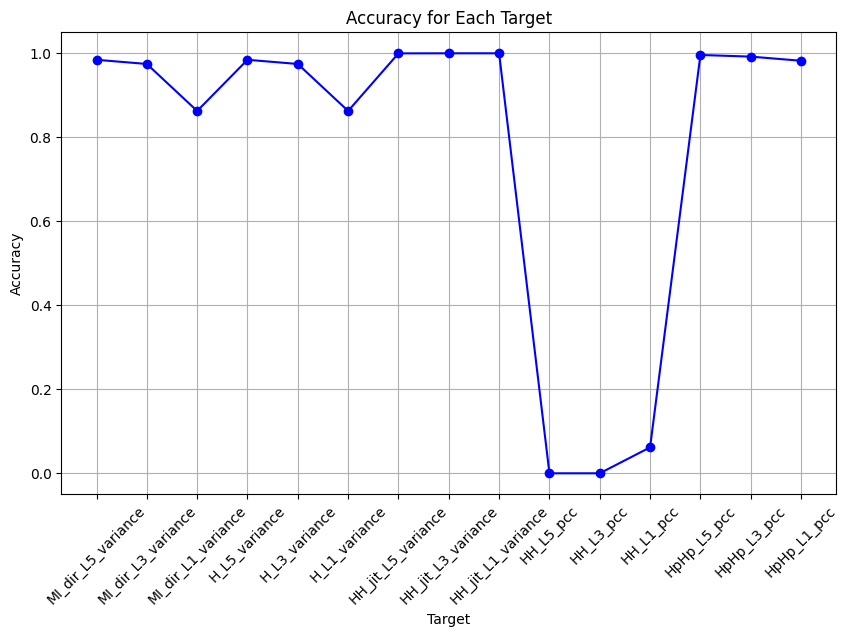

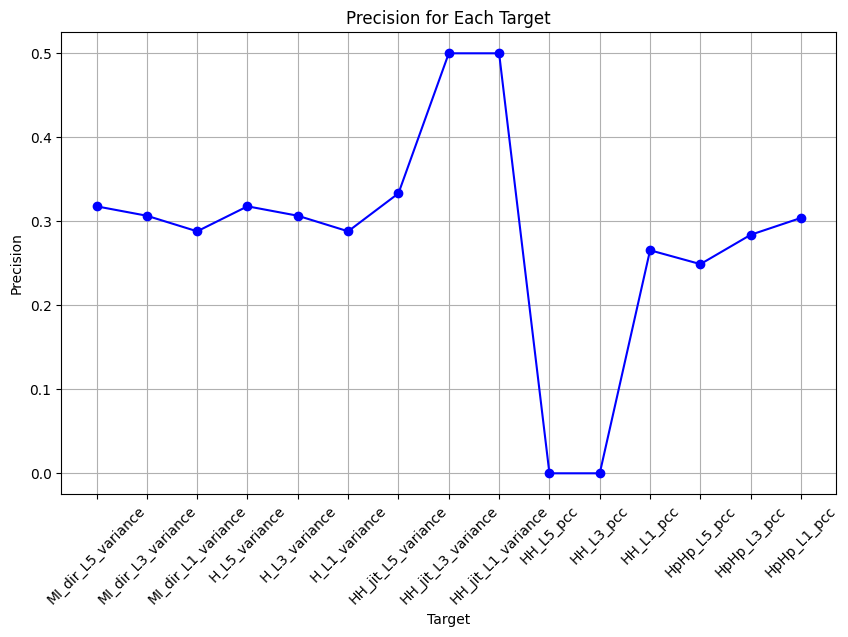

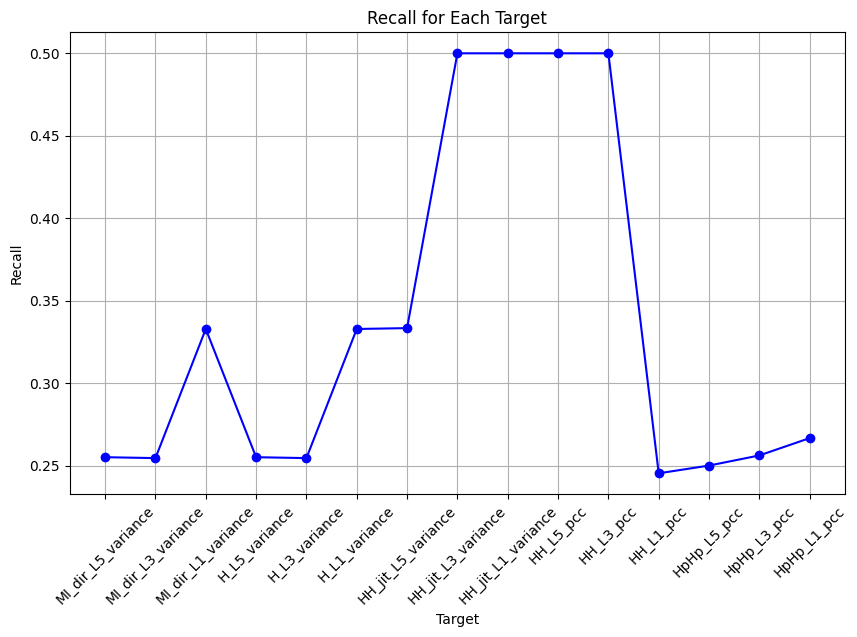

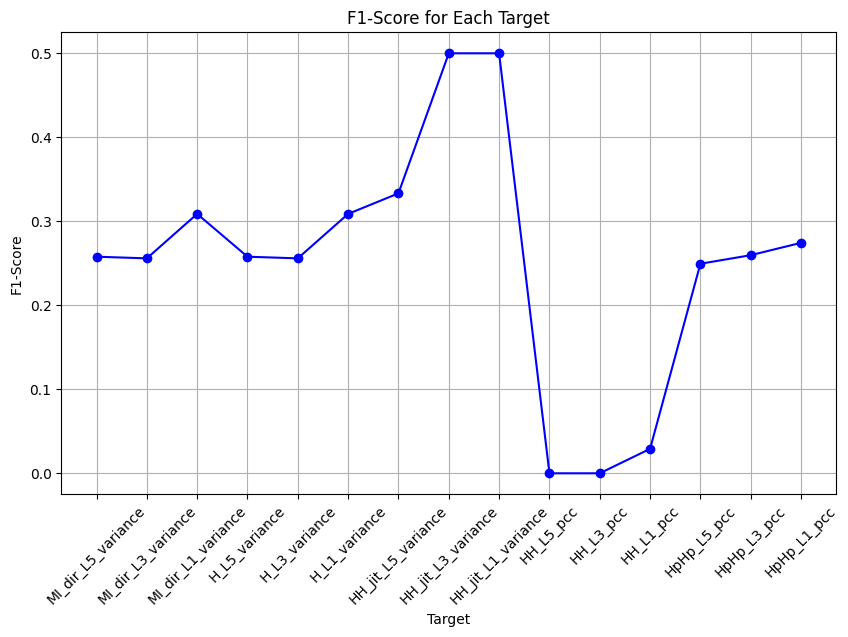

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.93484419 0.93891643 0.93555241 0.93802019 0.93624934]
Mean Cross-Validation Accuracy: 0.9367165109604688
Validation Set Performance:
Accuracy: 0.9345609065155808
Precision: 0.3351991828396323
Recall: 0.36728616628114114
F1-Score: 0.33299347564163767
Test Set Performance:
Accuracy: 0.935407105218426
Precision: 0.33457296013857096
Recall: 0.36148836978095916
F1-Score: 0.3328648104413141

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.92404391 0.92988669 0.92705382 0.92438463 0.93837436]
Mean Cross-Validation Accuracy: 0.9287486812672476
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Accuracy: 0.9240793201133144
Precision: 0.3723146850408363
Recall: 0.37831578797905013
F1-Score: 0.35092264682715396
Test Set Performance:
Accuracy: 0.9256331803501615
Precision: 0.33557791352257754
Recall: 0.36082126046824375
F1-Score: 0.33693832819012104

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Cross-Validation Accuracy Scores: [0.92953258 0.93643768 0.93537535 0.92810342 0.92668674]
Mean Cross-Validation Accuracy: 0.931227152625852
Validation Set Performance:
Accuracy: 0.9144475920679886
Precision: 0.32419403434769506
Recall: 0.3146198830409357
F1-Score: 0.31933521293960526
Test Set Performance:
Accuracy: 0.8261091279959204
Precision: 0.3215103863511077
Recall: 0.36891367070207254
F1-Score: 0.342054292212084

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.93484419 0.93891643 0.93555241 0.93802019 0.93624934]
Mean Cross-Validation Accuracy: 0.93

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Validation Set Performance:
Accuracy: 0.9345609065155808
Precision: 0.3351991828396323
Recall: 0.36728616628114114
F1-Score: 0.33299347564163767
Test Set Performance:
Accuracy: 0.935407105218426
Precision: 0.33457296013857096
Recall: 0.36148836978095916
F1-Score: 0.3328648104413141

--------------------------------------------------

Training model for target: H_L3_variance
Cross-Validation Accuracy Scores: [0.92404391 0.92988669 0.92705382 0.92438463 0.93837436]
Mean Cross-Validation Accuracy: 0.9287486812672476
Validation Set Performance:
Accuracy: 0.9240793201133144
Precision: 0.3723146850408363
Recall: 0.37831578797905013
F1-Score: 0.35092264682715396
Test Set Performance:
Accuracy: 0.9256331803501615
Precision: 0.33557791352257754
Recall: 0.36082126046824375
F1-Score: 0.33693832819012104

--------------------------------------------------

Training model for target: H_L1_variance
Cross-Validation Accuracy Scores: [0.92953258 0.93643768 0.93537535 0.92810342 0.92668674]
Mean Cross-

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Validation Set Performance:
Accuracy: 0.9144475920679886
Precision: 0.32419403434769506
Recall: 0.3146198830409357
F1-Score: 0.31933521293960526
Test Set Performance:
Accuracy: 0.8261091279959204
Precision: 0.3215103863511077
Recall: 0.36891367070207254
F1-Score: 0.342054292212084

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.99985835694051
Precision: 0.499929178470255
Recall: 0.5
F1-Score: 0.4999645867271053
Test Set Performance:
Accuracy: 0.9996600373958865
Precision: 0.3332200124652955
Recall: 0.3333333333333333
F1-Score: 0.3332766632664627

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Acc

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metric

Validation Set Performance:
Accuracy: 0.9997167138810198
Precision: 0.4998583569405099
Recall: 0.5
F1-Score: 0.4999291684374557
Test Set Performance:
Accuracy: 0.9998300186979432
Precision: 0.4999150093489716
Recall: 0.5
F1-Score: 0.49995750106247344

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.9997167138810198
Precision: 0.4998583569405099
Recall: 0.5
F1-Score: 0.4999291684374557
Test Set Performance:
Accuracy: 0.9998300186979432
Precision: 0.4999150093489716
Recall: 0.5
F1-Score: 0.49995750106247344

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metric

Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.00014164305949008498
Precision: 7.082152974504249e-05
Recall: 0.5
F1-Score: 0.000141622999575131
Test Set Performance:
Accuracy: 8.499065102838688e-05
Precision: 4.249532551419344e-05
Recall: 0.5
F1-Score: 8.498342823149487e-05

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.98689802 0.99344901 0.96405807 0.99698955 0.98477067]
Mean Cross-Validation Accuracy: 0.9852330651638338
Validation Set Performance:
Accuracy: 0.030453257790368272
Precision: 0.33183164308242874
Recall: 0.3434400680079343
F1-Score: 0.01971331153473019
Test Set Performance:
Accuracy: 0.0271970083290838
Precision: 0.4984423676012461
Recall: 0.013599660008499787
F1-Score: 0.026476915439351312

--------------------------------------------------

Training model fo

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: Fut

Cross-Validation Accuracy Scores: [0.94564448 0.9559136  0.94918555 0.94598902 0.94457234]
Mean Cross-Validation Accuracy: 0.948260997215298
Validation Set Performance:
Accuracy: 0.024787535410764873
Precision: 0.3586209338980612
Recall: 0.41882457279439717
F1-Score: 0.04774287526499874
Test Set Performance:
Accuracy: 0.020057793642699304
Precision: 0.3577507619009595
Recall: 0.4129341352271288
F1-Score: 0.04634003542649253

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.94812323 0.95414306 0.94652975 0.94652028 0.94421817]
Mean Cross-Validation Accuracy: 0.9479068958372944
Validation Set Performance:
Accuracy: 0.9441926345609065
Precision: 0.33525960624071627
Recall: 0.39908539474931287
F1-Score: 0.32920324626959724
Test Set Performance:
Accuracy: 0.9484956654767975
Precision: 0.3389631168507041
Recall: 0.4699251863230358
F1-Score: 0.33712734323959453

--------------------------------------------------

T

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.88137394 0.95201841 0.94245751 0.94350983 0.93943687]
Mean Cross-Validation Accuracy: 0.9317593111436743
Validation Set Performance:
Accuracy: 0.9415014164305949
Precision: 0.34074843654578224
Recall: 0.43878366203527736
F1-Score: 0.33993586327946046
Test Set Performance:
Accuracy: 0.9448410674825769
Precision: 0.3568525332311192
Recall: 0.4818036998972251
F1-Score: 0.35335336110623866

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Cross-Validation Accuracy Scores: [0.87623938 0.88580028 0.88279037 0.87958208 0.87285284]
Mean Cross-Validation Accuracy: 0.8794529899051415
Validation Set Performance:
Accuracy: 0.8756373937677053
Precision: 0.35372737205887855
Recall: 0.5319888580222468
F1-Score: 0.3445610486635817
Test Set Performance:
Accuracy: 0.8841577426483087
Precision: 0.3629034686974229
Recall: 0.5298004664420833
F1-Score: 0.3538368004144526

--------------------------------------------------

Overal

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


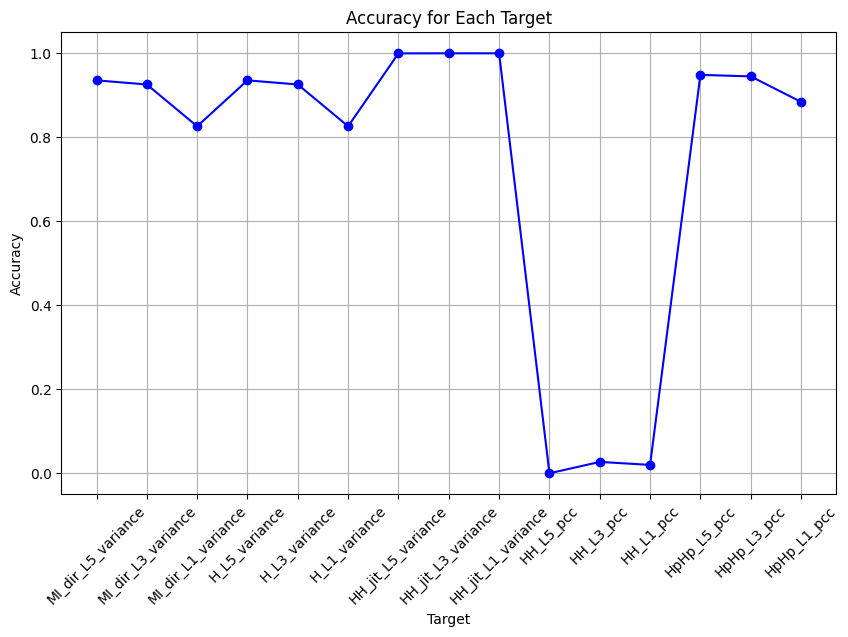

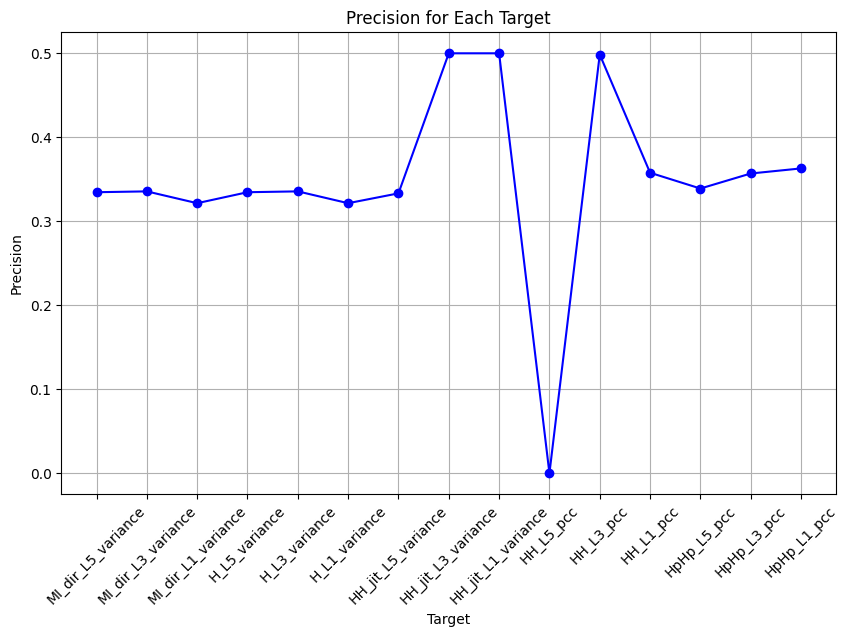

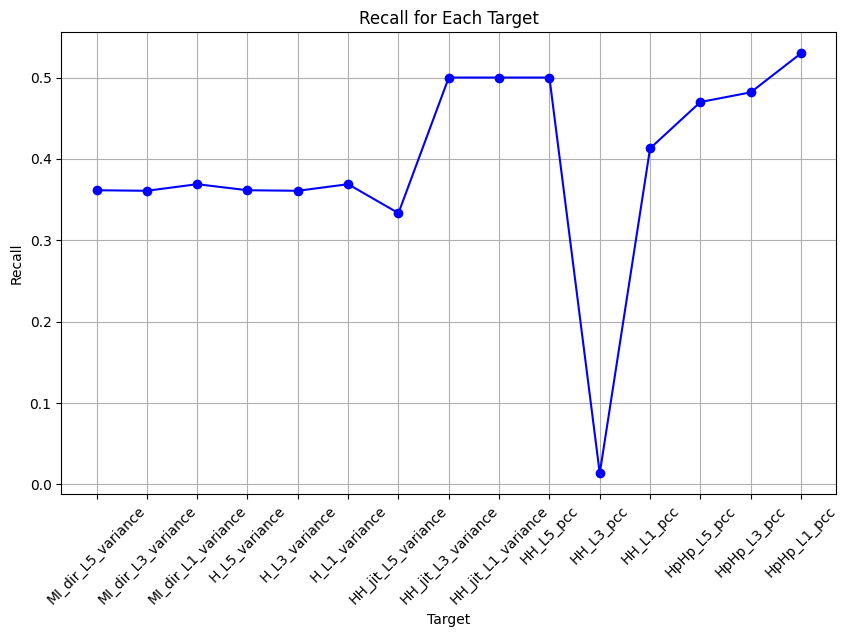

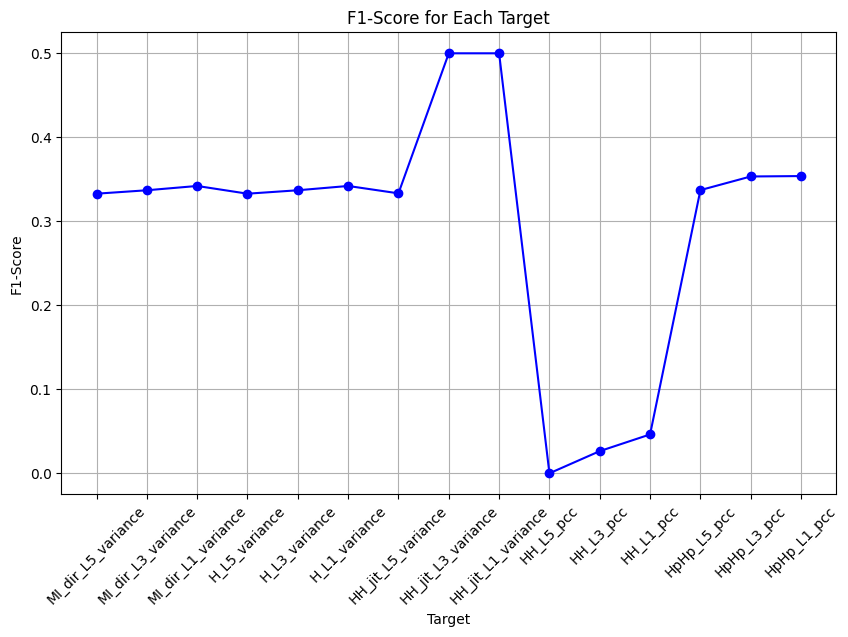

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.98583569 0.98601275 0.98583569 0.98654153 0.98601027]
Mean Cross-Validation Accuracy: 0.9860471866783787
Validation Set Performance:
Accuracy: 0.9861189801699717
Precision: 0.5908888303584091
Recall: 0.35452766477892106
F1-Score: 0.3694642020840651
Test Set Performance:
Accuracy: 0.985041645419004
Precision: 0.6617630385487528
Recall: 0.34437982225346814
F1-Score: 0.3523627923689104

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.97716006 0.97716006 0.976983   0.97715601 0.97768727]
Mean Cross-Validation Accuracy: 0.977229279152961
Validation Set Performance:
Accuracy: 0.9756373937677054
Precision: 0.6707216153591525
Recall: 0.352339321965584
F1-Score: 0.3655010576479121
Test Set Performance:
Accuracy: 0.9757776644569097
Precision: 0.78372678292925
Recall: 0.347242898015004
F1-Score: 0.3562495839668484

--------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.98583569 0.98601275 0.98583569 0.98654153 0.98601027]
Mean Cross-Validation Accuracy: 0.9860471866783787
Validation Set Performance:
Accuracy: 0.9861189801699717
Precision: 0.5908888303584091
Recall: 0.35452766477892106
F1-Score: 0.3694642020840651
Test Set Performance:
Accuracy: 0.985041645419004
Precision: 0.6617630385487528
Recall: 0.34437982225346814
F1-Score: 0.3523627923689104

--------------------------------------------------

Training model for target: H_L3_variance
Cross-Validation Accuracy Scores: [0.97716006 0.97716006 0.976983   0.97715601 0.97768727]
Mean Cross-Validation Accuracy: 0.977229279152961
Validation Set Performance:
Accuracy: 0.9756373937677054
Precision: 0.6707216153591525
Recall: 0.352339321965584
F1-Score: 0.3655010576479121
Test Set Performance:
Accuracy: 0.9757776644569097
Precision: 0.78372678292925
Recall: 0.347242898015004
F1-Score: 0.3562495839668484

--------------------------------------------------

Training mode

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 0.99982291 0.99982291]
Mean Cross-Validation Accuracy: 0.9998937551639393
Validation Set Performance:
Accuracy: 0.9997167138810198
Precision: 0.4999291684374557
Recall: 0.4999291684374557
F1-Score: 0.4999291684374557
Test Set Performance:
Accuracy: 0.9996600373958865
Precision: 0.3332200124652955
Recall: 0.3333333333333333
F1-Score: 0.3332766632664627

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 0.99982291 0.99982291]
Mean Cross-Validation Accuracy: 0.9998937551639393
Validation Set Performance:
Accuracy: 0.9995750708215297
Precision: 0.49985833687491144
Recall: 0.49992915840181357
F1-Score: 0.49989374512998513
Test Set Performance:
Accuracy: 0.9998300186979432
Precision: 0.4999150093489716
Recall: 0.5
F1-Score: 0.49995750106247344

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 0.99982291 0.99982291]
Mean Cross-Validation Accuracy: 0.9998937551639393
Validation Set Performance:
Accuracy: 0.9995750708215297
Precision: 0.49985833687491144
Recall: 0.49992915840181357
F1-Score: 0.49989374512998513
Test Set Performance:
Accuracy: 0.9998300186979432
Precision: 0.4999150093489716
Recall: 0.5
F1-Score: 0.49995750106247344

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.00014164305949008498
Precision: 7.082152974504249e-05
Recall: 0.5
F1-Score: 0.000141622999575131
Test Set Performance:
Accuracy: 8.499065102838688e-05
Precision: 4.249532551419344e-05
Recall: 0.5
F1-Score: 8.498342823149487e-05

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99982295 0.99982295 0.99982291 1.        ]
Mean Cross-Validation Accuracy: 0.9998937614346609
Validation Set Performance:
Accuracy: 0.00014164305949008498
Precision: 4.721435316336166e-05
Recall: 0.3333333333333333
F1-Score: 9.441533305008733e-05
Test Set Performance:
Accuracy: 8.499065102838688e-05
Precision: 2.833262501770789e-05
Recall: 0.3333333333333333
F1-Score: 5.6660434018924576e-05

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99893768 0.99876062 0.99911473 0.99893749 0.99946874]
Mean Cross-Validation Accuracy: 0.9990438529119474
Validation Set Performance:
Accuracy: 0.07422096317280454
Precision: 0.6189900508631841
Recall: 0.662772932127372
F1-Score: 0.33774423021337735
Test Set Performance:
Accuracy: 0.06467788543260242
Precision: 0.5740131093052648
Recall: 0.6494206217136154
F1-Score: 0.3010792586802155

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.99734419 0.99645892 0.99752125 0.99663538 0.99681247]
Mean Cross-Validation Accuracy: 0.996954442204264
Validation Set Performance:
Accuracy: 0.9963172804532577
Precision: 0.5544217687074829
Recall: 0.3808576032061957
F1-Score: 0.41114961243546394
Test Set Performance:
Accuracy: 0.9965153833078362
Precision: 0.8179699717218859
Recall: 0.4582764408033226
F1-Score: 0.5307630559239368

--------------------------------------------------

Training 

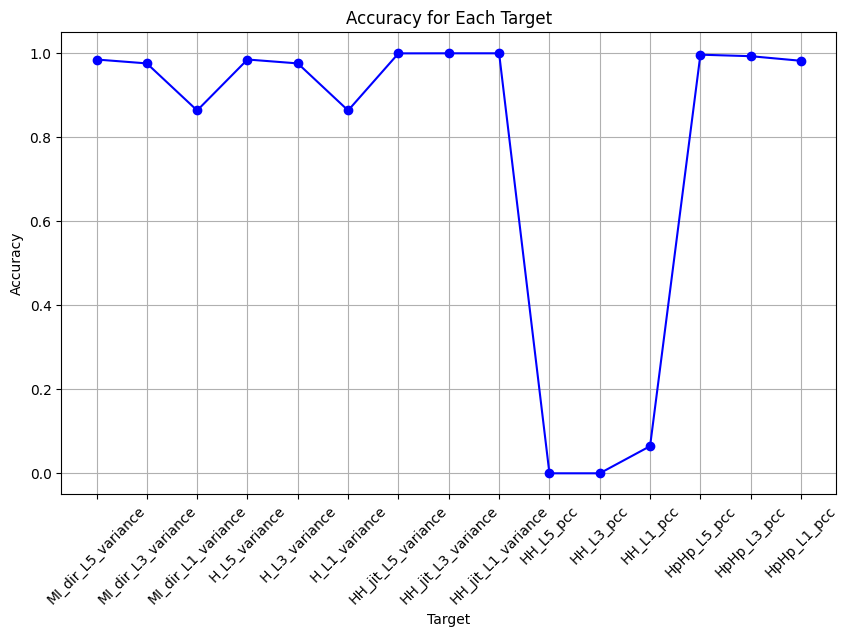

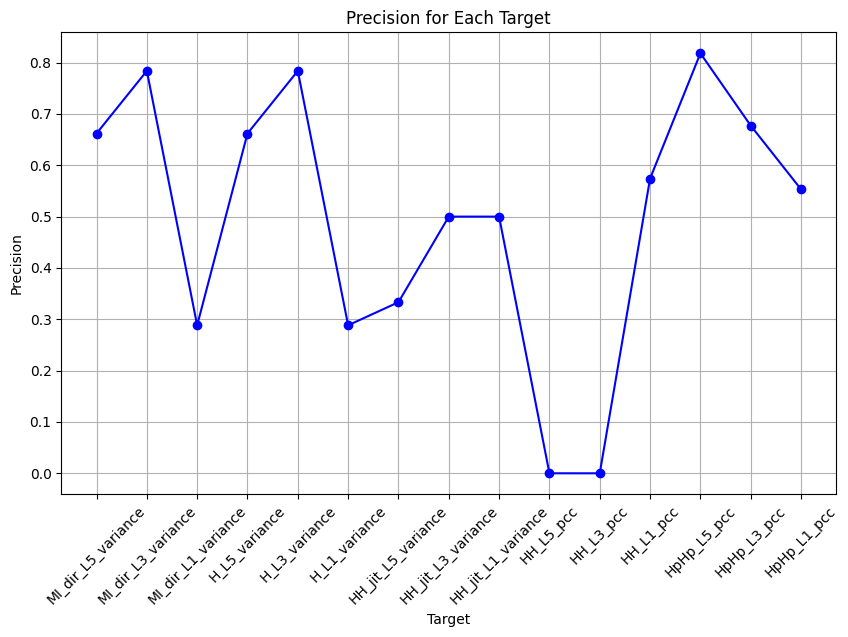

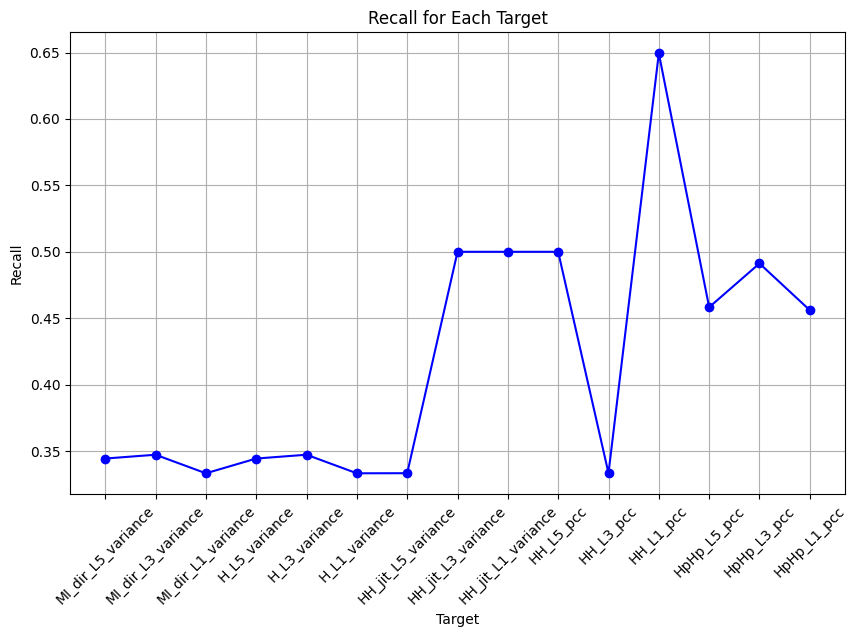

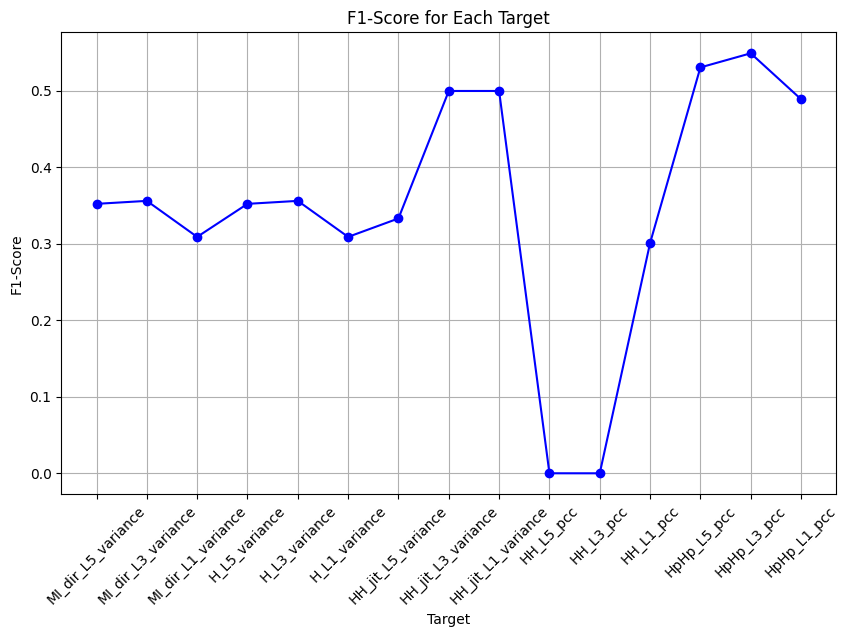

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Decision Tree model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.98583569 0.98601275 0.98583569 0.98654153 0.98601027]
Mean Cross-Validation Accuracy: 0.9860471866783787
Validation Set Performance:
Accuracy: 0.9861189801699717
Precision: 0.5908888303584091
Recall: 0.35452766477892106
F1-Score: 0.3694642020840651
Test Set Performance:
Accuracy: 0.985041645419004
Precision: 0.6617630385487528
Recall: 0.34437982225346814
F1-Score: 0.3523627923689104

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.97716006 0.97716006 0.976983   0.97715601 0.97768727]
Mean Cross-Validation Accuracy: 0.977229279152961
Validation Set Performance:
Accuracy: 0.9756373937677054
Precision: 0.6707216153591525
Recall: 0.352339321965584
F1-Score: 0.3655010576479121
Test Set Performance:
Accuracy: 0.9757776644569097
Precision: 0.78372678292925
Recall: 0.347242898015004
F1-Score: 0.3562495839668484

--------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.98583569 0.98601275 0.98583569 0.98654153 0.98601027]
Mean Cross-Validation Accuracy: 0.9860471866783787
Validation Set Performance:
Accuracy: 0.9861189801699717
Precision: 0.5908888303584091
Recall: 0.35452766477892106
F1-Score: 0.3694642020840651
Test Set Performance:
Accuracy: 0.985041645419004
Precision: 0.6617630385487528
Recall: 0.34437982225346814
F1-Score: 0.3523627923689104

--------------------------------------------------

Training model for target: H_L3_variance
Cross-Validation Accuracy Scores: [0.97716006 0.97716006 0.976983   0.97715601 0.97768727]
Mean Cross-Validation Accuracy: 0.977229279152961
Validation Set Performance:
Accuracy: 0.9756373937677054
Precision: 0.6707216153591525
Recall: 0.352339321965584
F1-Score: 0.3655010576479121
Test Set Performance:
Accuracy: 0.9757776644569097
Precision: 0.78372678292925
Recall: 0.347242898015004
F1-Score: 0.3562495839668484

--------------------------------------------------

Training mode

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 0.99982291 0.99982291]
Mean Cross-Validation Accuracy: 0.9998937551639393
Validation Set Performance:
Accuracy: 0.9997167138810198
Precision: 0.4999291684374557
Recall: 0.4999291684374557
F1-Score: 0.4999291684374557
Test Set Performance:
Accuracy: 0.9996600373958865
Precision: 0.3332200124652955
Recall: 0.3333333333333333
F1-Score: 0.3332766632664627

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 0.99982291 0.99982291]
Mean Cross-Validation Accuracy: 0.9998937551639393
Validation Set Performance:
Accuracy: 0.9995750708215297
Precision: 0.49985833687491144
Recall: 0.49992915840181357
F1-Score: 0.49989374512998513
Test Set Performance:
Accuracy: 0.9998300186979432
Precision: 0.4999150093489716
Recall: 0.5
F1-Score: 0.49995750106247344

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 0.99982291 0.99982291]
Mean Cross-Validation Accuracy: 0.9998937551639393
Validation Set Performance:
Accuracy: 0.9995750708215297
Precision: 0.49985833687491144
Recall: 0.49992915840181357
F1-Score: 0.49989374512998513
Test Set Performance:
Accuracy: 0.9998300186979432
Precision: 0.4999150093489716
Recall: 0.5
F1-Score: 0.49995750106247344

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         0.99982295 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999645892351274
Validation Set Performance:
Accuracy: 0.00014164305949008498
Precision: 7.082152974504249e-05
Recall: 0.5
F1-Score: 0.000141622999575131
Test Set Performance:
Accuracy: 8.499065102838688e-05
Precision: 4.249532551419344e-05
Recall: 0.5
F1-Score: 8.498342823149487e-05

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99982295 0.99982295 0.99982291 1.        ]
Mean Cross-Validation Accuracy: 0.9998937614346609
Validation Set Performance:
Accuracy: 0.00014164305949008498
Precision: 4.721435316336166e-05
Recall: 0.3333333333333333
F1-Score: 9.441533305008733e-05
Test Set Performance:
Accuracy: 8.499065102838688e-05
Precision: 2.833262501770789e-05
Recall: 0.3333333333333333
F1-Score: 5.6660434018924576e-05

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99893768 0.99876062 0.99911473 0.99893749 0.99946874]
Mean Cross-Validation Accuracy: 0.9990438529119474
Validation Set Performance:
Accuracy: 0.07422096317280454
Precision: 0.6189900508631841
Recall: 0.662772932127372
F1-Score: 0.33774423021337735
Test Set Performance:
Accuracy: 0.06467788543260242
Precision: 0.5740131093052648
Recall: 0.6494206217136154
F1-Score: 0.3010792586802155

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.99734419 0.99645892 0.99752125 0.99663538 0.99681247]
Mean Cross-Validation Accuracy: 0.996954442204264
Validation Set Performance:
Accuracy: 0.9963172804532577
Precision: 0.5544217687074829
Recall: 0.3808576032061957
F1-Score: 0.41114961243546394
Test Set Performance:
Accuracy: 0.9965153833078362
Precision: 0.8179699717218859
Recall: 0.4582764408033226
F1-Score: 0.5307630559239368

--------------------------------------------------

Training 

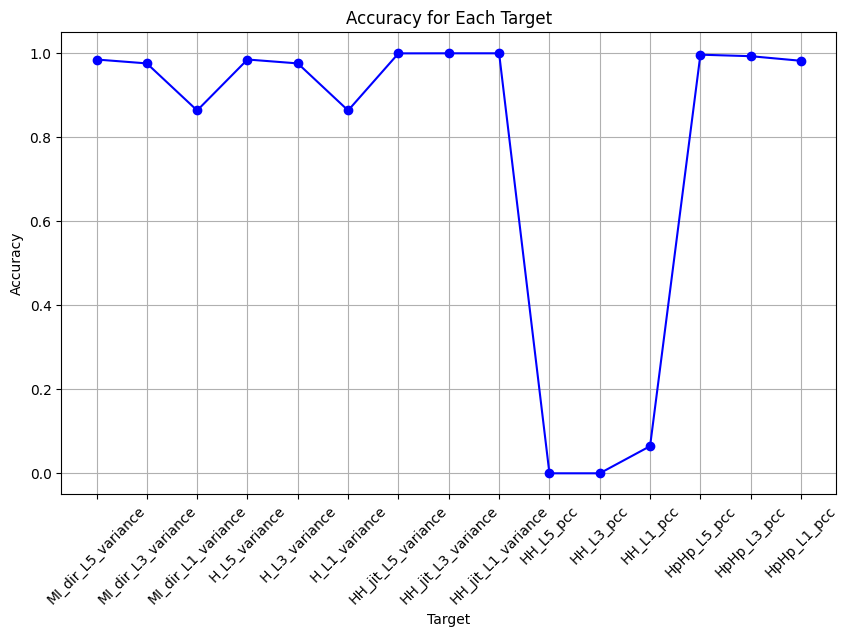

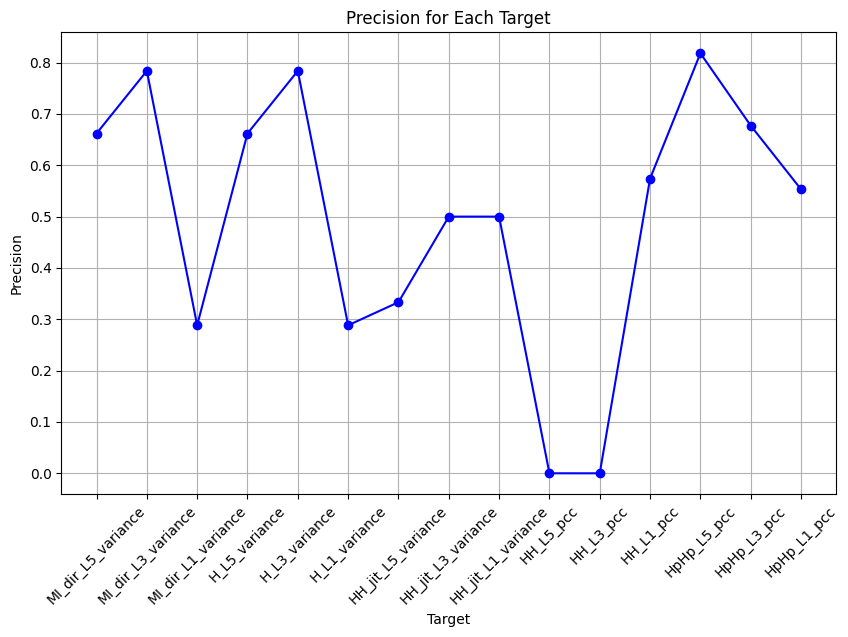

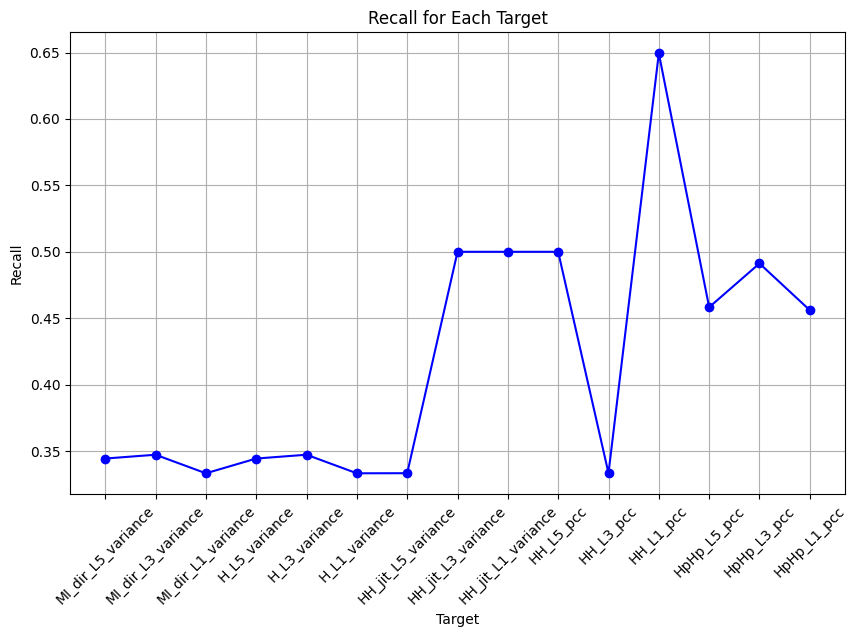

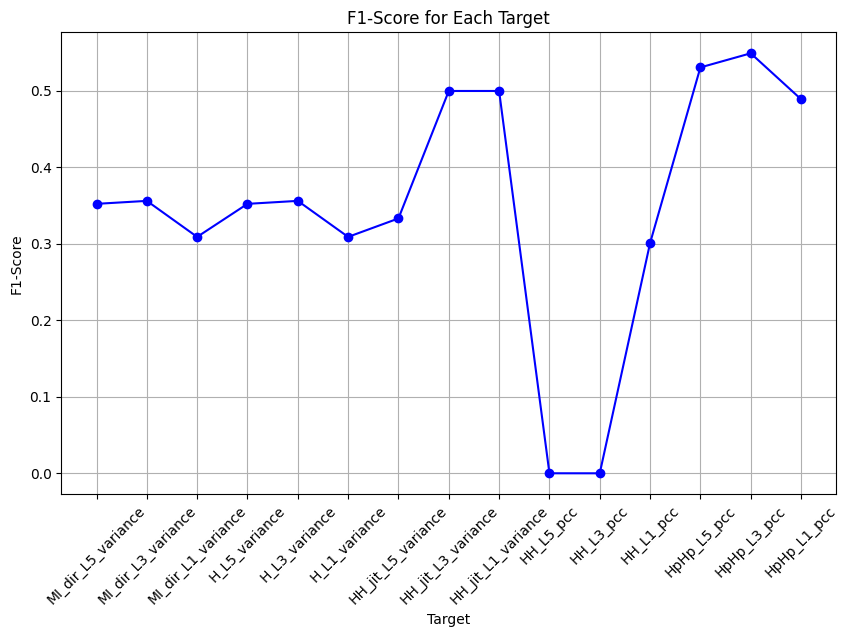

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

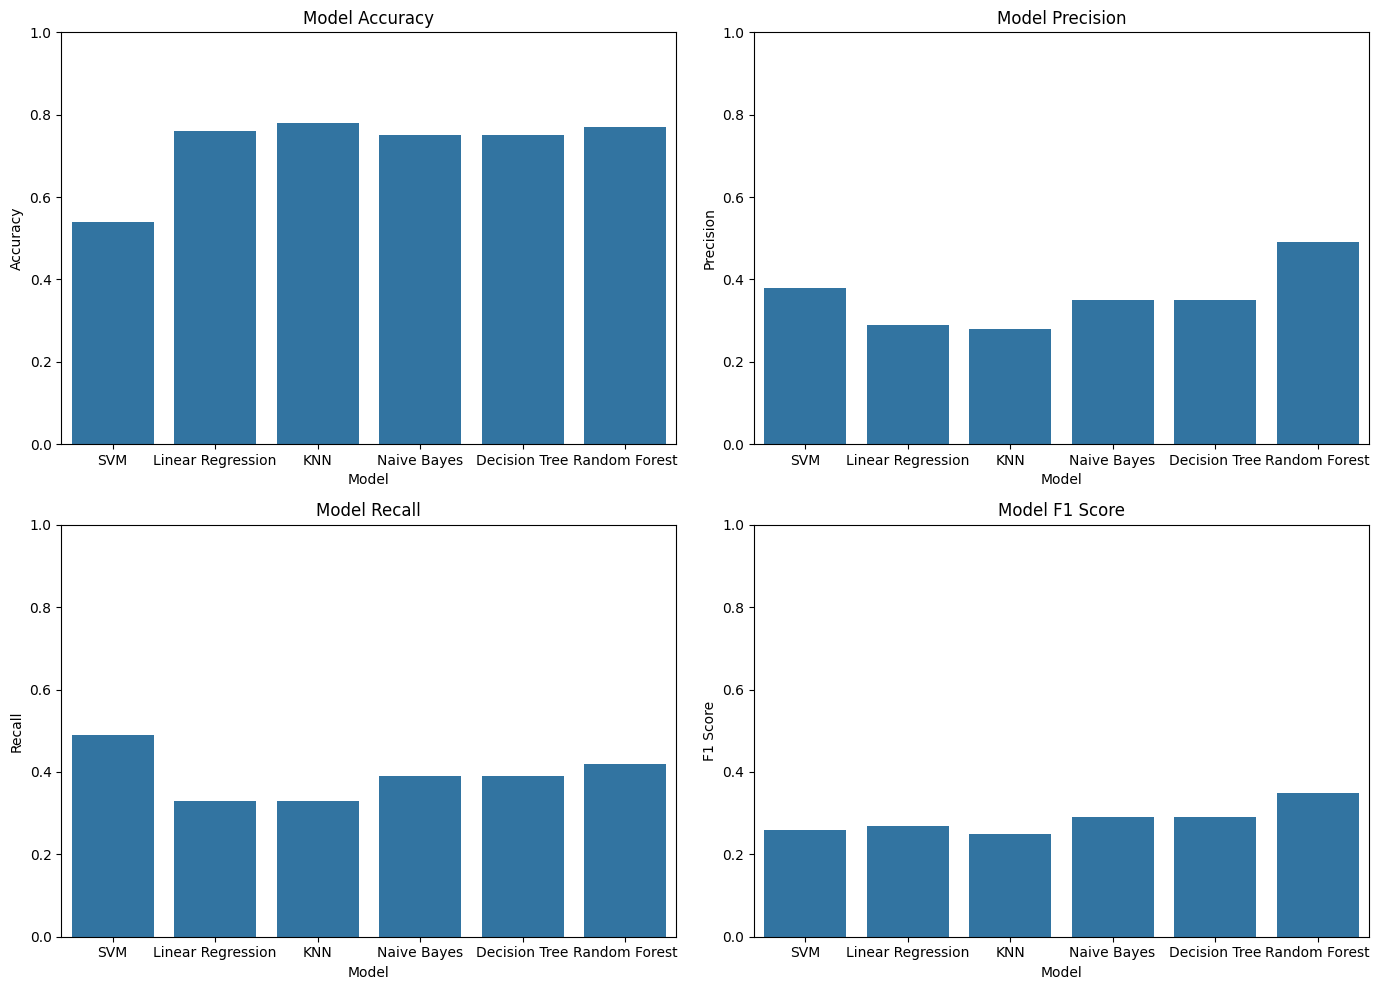

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.54, 0.76, 0.78, 0.75, 0.75, 0.77],
    'Precision': [0.38, 0.29, 0.28,0.35 ,0.35, 0.49],
    'Recall': [0.49, 0.33, 0.33, 0.39, 0.39, 0.42],
    'F1 Score': [0.26, 0.27, 0.25, 0.29, 0.29, 0.35]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()